                                                    Final Project
                                                    Mirnes Salkic   
                                                      Big Data   
                                                   Trent University   
                                                      April 2018  

# 1. Importing Libraries and Loading/Merging Data

In [1421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

In [1097]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
#frames = [train_df, test_df]
#data_df = pd.concat(frames)

In [1098]:
print("Train shape : {}".format(train_df.shape))
print("Test shape : {}".format(test_df.shape))
#print("Combined shape : {}".format(data_df.shape))

Train shape : (1460, 81)
Test shape : (1459, 80)


# 2. Exploratory Data Analysis 

## 2.1. Viewing the columns and storing the target seperately

In [1099]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1100]:
#creating a copy of the train and test data
tr_df = train_df.copy()
te_df = test_df.copy()

In [1101]:
#SalePrice is stored as y
y = tr_df[["SalePrice"]]

#Dropping the SalePrice from the train data
tr_df = tr_df.drop("SalePrice", axis=1)

## 2.2. Checking for duplicate data 

In [1102]:
#Check if there is any duplicate data. There does not seem to be any as the number of rows and columns did not change.
train_df.drop_duplicates().shape
print("Returning the shape after dropping duplicate values in train data if any: {}".format(train_df.shape))

test_df.drop_duplicates().shape
print("Returning the shape after dropping duplicate values in test data if any: {}".format(test_df.shape))

Returning the shape after dropping duplicate values in train data if any: (1460, 81)
Returning the shape after dropping duplicate values in test data if any: (1459, 80)


## 2.3. Check if the train and test have same columns

In [1103]:
#check to see if the columns in train and test set are the same
tr_df.columns == te_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

## 2.4. Exploring the data types

In [1104]:
# What datatypes are we dealing with?
print(tr_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 2.5. Inspecting Variables
## 2.5.1. SalePrice

In [1105]:
print(y.describe())

           SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000


In [1106]:
print("The min and max prices seems reasonable.")

The min and max prices seems reasonable.


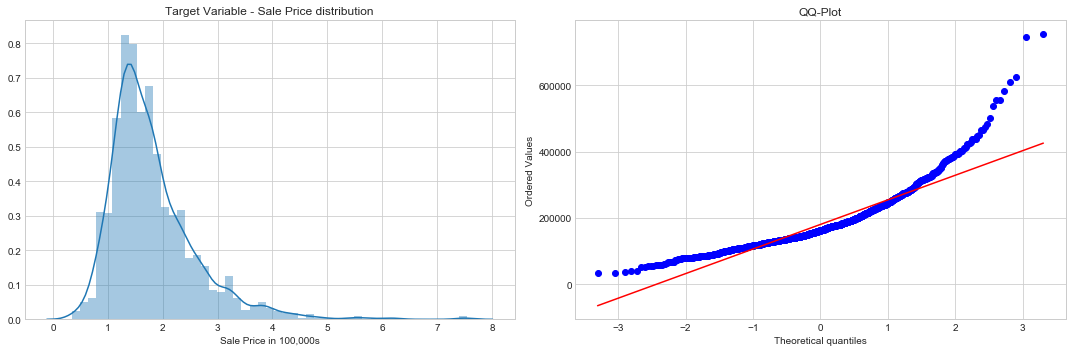

In [1107]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot((y["SalePrice"]/100000).dropna())
plt.title("Target Variable - Sale Price distribution")
plt.xlabel("Sale Price in 100,000s")

plt.subplot(1, 2, 2)
stats.probplot(y["SalePrice"].dropna(), plot=plt)
plt.title("QQ-Plot")
plt.tight_layout()
plt.show()

SalesPrice seems to be right skewed and does not fully follow a normal distribution as it is verified this with a QQ-Plot. It is important to note that multiple linear regression does not require the dependent and independent variables to be normally distributed. However, the instructions indicate that the dependent variable should be log transformed as it is the only way to do submission. Moreover, the advantage of doing so, according to Kaggle evaluation section, is that "errors in predicting expensive houses and cheap houses will affect the result equally."

The log transformation will be applied in a later section.

## 2.5.2 Id 

The Id variable is clearly not a useful predictor variable. The variable can be dropped for both the train and test data. However, the variable will be used for submission of the results and thus will be stored seperately only for test data.

In [1108]:
tr_df = tr_df.drop("Id", axis=1)
te_id = te_df[["Id"]]
te_df = te_df.drop("Id", axis=1)

## 2.6. Missing Values

## 2.6.1. Missing Values - Train data

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


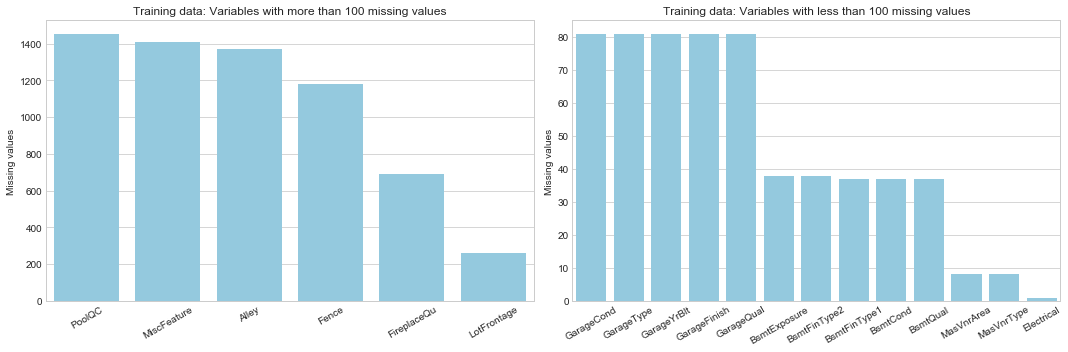

In [1109]:
missing_tr = tr_df.isnull().sum().sort_values(ascending=False) 

missing_tr_df1 = pd.DataFrame()
missing_tr_df2 = pd.DataFrame()

missing_tr_df1["missing>100"] = missing_tr[missing_tr > 100]
missing_tr_df2["missing<100"] = missing_tr[(missing_tr > 0) & (missing_tr <= 100)]

fig, ax = plt.subplots(figsize=(15, 5))
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
sns.barplot(x=missing_tr_df1.index, y="missing>100", data = missing_tr_df1, color="skyblue")
plt.xticks(rotation=30)
plt.title("Training data: Variables with more than 100 missing values")
plt.ylabel("Missing values")

plt.subplot(1, 2, 2)
sns.barplot(x=missing_tr_df2.index, y ="missing<100", data = missing_tr_df2, color = "skyblue")
plt.xticks(rotation=30)
plt.title("Training data: Variables with less than 100 missing values")
plt.ylabel("Missing values")

plt.tight_layout()
plt.show()

## 2.6.2 Missing Values - Test data

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


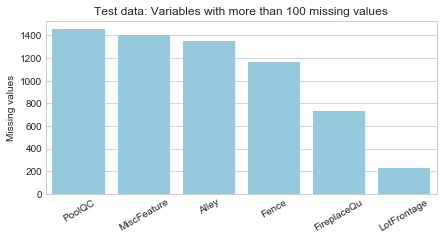

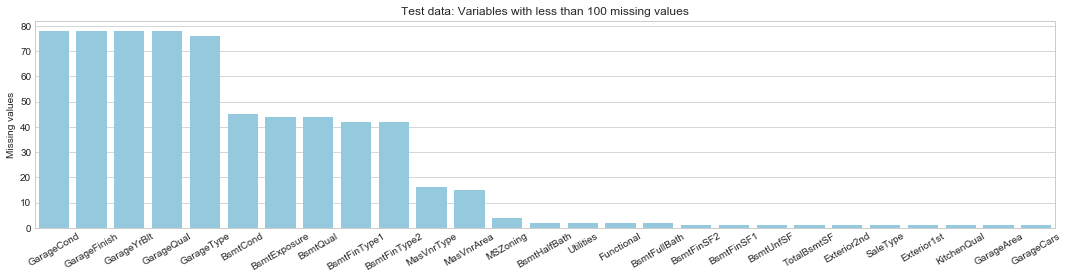

In [1110]:
missing_te = te_df.isnull().sum().sort_values(ascending=False)

missing_te_df1 = pd.DataFrame()
missing_te_df2 = pd.DataFrame()

missing_te_df1["missing>100"] = missing_te[missing_te > 100]
missing_te_df2["missing<100"] = missing_te[(missing_te > 0) & (missing_te <= 100)]

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(7, 7))
plt.subplot(2, 1, 1)
sns.barplot(x=missing_te_df1.index, y="missing>100", data = missing_te_df1, color="skyblue")
plt.xticks(rotation=30)
plt.title("Test data: Variables with more than 100 missing values")
plt.ylabel("Missing values")

fig, ax = plt.subplots(figsize=(15, 7))
plt.subplot(2,1,2)
sns.barplot(x=missing_te_df2.index, y ="missing<100", data = missing_te_df2, color = "skyblue")
plt.xticks(rotation=30)
plt.title("Test data: Variables with less than 100 missing values")
plt.ylabel("Missing values")

plt.tight_layout()
plt.show()


There are 33 variables with at least one missing value. Not all values are missing.

### PoolQC - pool quality

PoolQC is an ordinal variable with few levels: Excellent (Ex), Good (Gd), Average/Typical (TA), Fair (Fa). According to the data set description NA stands for No Pool. This makes sense as most houses do not have pools. 

In [1111]:
tr_df["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [1112]:
tr_df["PoolQC"].fillna("None", inplace=True)
te_df["PoolQC"].fillna("None", inplace=True)

### MiscFeature - Miscellaneous feature not covered in other categories

There are relatively few values in some of the categories. Additionaly, there are some categories in the training set that do not exist in the test set. It would be wise to remove them as they may cause overfitting - this will be done later. For now, I will fill the missing values following the instructions for the data set and label them as "None".

In [1113]:
tr_df["MiscFeature"].value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [1114]:
te_df["MiscFeature"].value_counts(dropna=False)

NaN     1408
Shed      46
Gar2       3
Othr       2
Name: MiscFeature, dtype: int64

In [1115]:
tr_df["MiscFeature"].fillna("None", inplace=True)
te_df["MiscFeature"].fillna("None", inplace=True)

### Alley - Type of alley access to property

This is a categorical feature. The NaN's represent no alley access, and will thus be labeled as "None".

In [1116]:
tr_df["Alley"].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [1117]:
te_df["Alley"].value_counts(dropna=False)

NaN     1352
Grvl      70
Pave      37
Name: Alley, dtype: int64

In [1118]:
tr_df["Alley"].fillna("None", inplace=True)
te_df["Alley"].fillna("None", inplace=True)

### Fence - Fence quality

This is an ordinal attribute.   
MnWw - Minimum Wood/Wire  
GdWo - Good Wood  
MnPrv - Minimum Privacy  
GdPrv - Good Privacy   

This is a tricky attribute as there does not seem to be a natural order of levels. For instance, good wood could both correspond to good and minimum privacy; in other words, it does seem to be mutually exclusive. Nevertheless, the NaN values correspond to No Fence and will be imputed using the word "None". 

In [1119]:
tr_df["Fence"].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [1120]:
te_df["Fence"].value_counts(dropna=False)

NaN      1169
MnPrv     172
GdPrv      59
GdWo       58
MnWw        1
Name: Fence, dtype: int64

In [1121]:
tr_df["Fence"].fillna("None", inplace=True)
te_df["Fence"].fillna("None", inplace=True)

### FireplaceQu - Fireplace Quality

This is an ordinal attribute. 

Ex - Excellent - Exceptionsal Masonry Fireplace   
Gd - Masonry Fireplace in main level  
TA - Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement  
Fa - Fair - Prefabricated Fireplace in basement   
Po - Poor - Ben Franklin Stove 

NA indicates "No Fireplace" and should be filled with "None".

In [1122]:
tr_df["FireplaceQu"].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [1123]:
te_df["FireplaceQu"].value_counts(dropna=False)

NaN    730
Gd     364
TA     279
Fa      41
Po      26
Ex      19
Name: FireplaceQu, dtype: int64

In [1124]:
tr_df["FireplaceQu"].fillna("None", inplace=True)
te_df["FireplaceQu"].fillna("None", inplace=True)

### LotFrontage - Linear feet of street connected to property

This is a numeric attribute. It would make sense to impute the missing value using the median rather than the mean
as the median is not affected by outliers, which makes it more robust. Instead of using the median for the entire dataset, it would be clever to use the median on some conditional variable. After going through all the variables, I thought that neighborhood might be a good choice. 

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


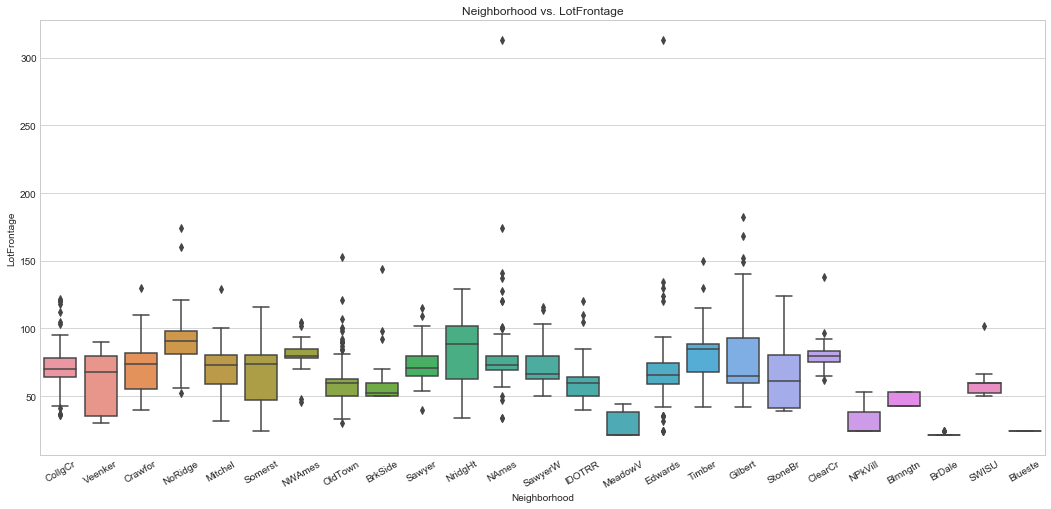

In [1125]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.boxplot(x="Neighborhood", y="LotFrontage", data = tr_df)
plt.xticks(rotation=30)
plt.title("Neighborhood vs. LotFrontage")
plt.show()

The graph from above indicated that the LotFrontage indeed varies between neighborhoods. Thus, using the median conditional upon the neighborhoods rather than the overall median might be a better choice.

In [1126]:
lotfrontage_by_neigh = tr_df["LotFrontage"].groupby(tr_df["Neighborhood"])

In [1127]:
for group_name, group in lotfrontage_by_neigh:
      index = (tr_df["Neighborhood"] == group_name) & (tr_df["LotFrontage"].isnull())
      tr_df.loc[index, "LotFrontage"] = group.median()  

In [1128]:
lotfrontage_by_neigh_te = te_df["LotFrontage"].groupby(te_df["Neighborhood"])

In [1129]:
for group_name, group in lotfrontage_by_neigh_te:
    index = (te_df["Neighborhood"] == group_name) & (te_df["LotFrontage"].isnull())
    te_df.loc[index, "LotFrontage"] = group.median()

### GarageCond - Garage condition

This is an ordinal attribute. "NA" indicates that there is "No Garage". 

In [1130]:
tr_df["GarageCond"].value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [1131]:
te_df["GarageCond"].value_counts(dropna=False)

TA     1328
NaN      78
Fa       39
Po        7
Gd        6
Ex        1
Name: GarageCond, dtype: int64

In [1132]:
tr_df["GarageCond"].fillna("None", inplace=True)
te_df["GarageCond"].fillna("None", inplace=True)

### GarageFinish - Interior finish of the garage

This is an ordinal variable. NaN's stand for "No Garage".

In [1133]:
tr_df["GarageFinish"].value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [1134]:
te_df["GarageFinish"].value_counts(dropna=False)

Unf    625
RFn    389
Fin    367
NaN     78
Name: GarageFinish, dtype: int64

In [1135]:
tr_df["GarageFinish"].fillna("None", inplace=True)
te_df["GarageFinish"].fillna("None", inplace=True)

### GarageYrBlt - Year garage was built

This is a numeric variable. The NaN's indicate the the garage was not built. Thus, I will encode the value as 0. 

In [1136]:
tr_df["GarageYrBlt"].fillna(0, inplace=True)
te_df["GarageYrBlt"].fillna(0, inplace=True)

### GarageQual - Garage quality

This is another oridinal variable; NA means "No Garage".

In [1137]:
tr_df["GarageQual"].value_counts(dropna=False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [1138]:
te_df["GarageQual"].value_counts(dropna=False)

TA     1293
NaN      78
Fa       76
Gd       10
Po        2
Name: GarageQual, dtype: int64

In [1139]:
tr_df["GarageQual"].fillna("None", inplace=True)
te_df["GarageQual"].fillna("None", inplace=True)

### GarageType - Garage location

This is a nominal variable. NA - "No Garage".

In [1140]:
tr_df["GarageType"].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1141]:
te_df["GarageType"].value_counts(dropna=False)

Attchd     853
Detchd     392
BuiltIn     98
NaN         76
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

In [1142]:
tr_df["GarageType"].fillna("None", inplace=True)
te_df["GarageType"].fillna("None", inplace=True)

### BsmtCond - Evaluate the general condition of the basement 

This is an ordinal variable, NA - "No Basement".

In [1143]:
tr_df["BsmtCond"].value_counts(dropna=False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

In [1144]:
te_df["BsmtCond"].value_counts(dropna=False)

TA     1295
Fa       59
Gd       57
NaN      45
Po        3
Name: BsmtCond, dtype: int64

In [1145]:
tr_df["BsmtCond"].fillna("None", inplace=True)
te_df["BsmtCond"].fillna("None", inplace=True)

### BsmtExposure - Refers to walkout or garden level walls

This is an ordinal feature - NaN = "No Basement". 

In [1146]:
tr_df["BsmtExposure"].value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

In [1147]:
te_df["BsmtExposure"].value_counts(dropna=False)

No     951
Av     197
Gd     142
Mn     125
NaN     44
Name: BsmtExposure, dtype: int64

In [1148]:
tr_df["BsmtExposure"].fillna("None", inplace=True)
te_df["BsmtExposure"].fillna("None", inplace=True)

### BsmtQual - Evaluates the height of the basement 

This is an ordinal variable. NaN - "No Basement".

In [1149]:
tr_df["BsmtQual"].value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [1150]:
te_df["BsmtQual"].value_counts(dropna=False)

TA     634
Gd     591
Ex     137
Fa      53
NaN     44
Name: BsmtQual, dtype: int64

In [1151]:
tr_df["BsmtQual"].fillna("None", inplace=True)
te_df["BsmtQual"].fillna("None", inplace=True)

### BsmtFinType1 - Rating of basement finished area

This is an ordinal variable. NA - "No Basement".

In [1152]:
tr_df["BsmtFinType1"].value_counts(dropna=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

In [1153]:
te_df["BsmtFinType1"].value_counts(dropna=False)

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
NaN     42
Name: BsmtFinType1, dtype: int64

In [1154]:
tr_df["BsmtFinType1"].fillna("None", inplace=True)
te_df["BsmtFinType1"].fillna("None", inplace=True)

### BsmtFinType2 - Rating of basement finished area (if multiple types)

This is an ordinal variable. NaN - "No Basement".

In [1155]:
tr_df["BsmtFinType2"].value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [1156]:
te_df["BsmtFinType2"].value_counts(dropna=False)

Unf    1237
Rec      51
NaN      42
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [1157]:
tr_df["BsmtFinType2"].fillna("None", inplace=True)
te_df["BsmtFinType2"].fillna("None", inplace=True)

### MasVnrType - Masonry vaneer type

This is a nominal variable. There are 8 missing values in the train and 16 in the test set. Since it is unclear what the NaN values represent, I decided to use the mode to impute those missing values. The mode, as it can be seen from below, is "None".

In [1158]:
tr_df["MasVnrType"].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [1159]:
te_df["MasVnrType"].value_counts(dropna=False)

None       878
BrkFace    434
Stone      121
NaN         16
BrkCmn      10
Name: MasVnrType, dtype: int64

In [1160]:
tr_df["MasVnrType"].fillna("None", inplace=True)
te_df["MasVnrType"].fillna("None", inplace=True)

### MasVnrArea - Masonry vaneer area in square feet

This is a numeric (ratio) variable. There are 8 missing values in the train and 15 in the test data set. This is similar to the previous variable MasVnrType. There is more to it, as a house that has MasVnrType = "None" would have a 0 MasVnrArea. Thus, it helps to conditionally fill the missing values here, instead of using mean/median for example.

In [1161]:
index = tr_df["MasVnrType"] == "None"
tr_df.loc[index, "MasVnrArea"] = tr_df.loc[index, "MasVnrArea"].fillna(0)

In [1162]:
index2 = te_df["MasVnrType"] == "None"
te_df.loc[index2, "MasVnrArea"] = te_df.loc[index2, "MasVnrArea"].fillna(0)

In [1163]:
tr_df["MasVnrArea"].isnull().sum()

0

In [1164]:
te_df["MasVnrArea"].isnull().sum()

0

### MSZoning - Identifies the general zoning classification of the sale

For this nominal variable, there are only four missing values in the test set. I use the mode to impute the missing values. 

In [1165]:
tr_df["MSZoning"].value_counts(dropna=False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [1166]:
te_df["MSZoning"].value_counts(dropna=False)

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

In [1167]:
te_df["MSZoning"].fillna("RL", inplace=True)

### BsmtHalfBath - Basement half bathrooms

This numeric variable describes the number of basement half bathrooms. There are only 2 missing values in the test set. I will use the median to impute the missing value. 

In [1168]:
te_df["BsmtHalfBath"].fillna(te_df["BsmtHalfBath"].median(), inplace=True)

### Utilities - Type of utilities available 

This is a nominal variable. There are 2 missing values for the test data. However, after close inspection, we can see that all the variables in the test set belong to "AllPub" - All public utilities while in the train set there is only one value that belong to a level other than "AllPub". Instead of imputing the missing values, it makes sense to delete the variable as it does not help us in predicting our target variable. 

In [1169]:
te_df["Utilities"].value_counts(dropna=False)

AllPub    1457
NaN          2
Name: Utilities, dtype: int64

In [1170]:
tr_df["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [1171]:
tr_df.drop("Utilities", axis=1, inplace=True)
te_df.drop("Utilities", axis=1, inplace=True)

### Functional - Home functionality (Assume typical unless deductions are warranted)

There are two missing values in the test set. We will impute the values using the median, which is typical in this case.

In [1172]:
tr_df["Functional"].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [1173]:
te_df["Functional"].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [1174]:
te_df["Functional"].fillna("Typ", inplace=True)

### BsmtFullBath - Basement full bathrooms

Here we also have only two missing values for the test set. The missing value will be imputed using the mode, which is 0. 

In [1175]:
tr_df["BsmtFullBath"].value_counts(dropna=False)

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [1176]:
te_df["BsmtFullBath"].value_counts(dropna=False)

 0.0    849
 1.0    584
 2.0     23
NaN       2
 3.0      1
Name: BsmtFullBath, dtype: int64

In [1177]:
te_df["BsmtFullBath"].fillna(0, inplace=True)

In [1178]:
te_df["BsmtFullBath"] = te_df["BsmtFullBath"].astype(int)

### BsmtFinSF2 - Type 2 finished square feet

There is only one missing value for the test set. I will use the median to fill this value. 

In [1179]:
te_df["BsmtFinSF2"].fillna(te_df["BsmtFinSF2"].median(), inplace=True)

### BsmtFinSF1 - Type 1 finished square feet

There is only one missing value for the test set. After inspecting this variable, I find that this house does not contain a basement, and thus the missing value can be filled with 0. 

In [1180]:
te_df["BsmtFinSF1"].isnull().sum()

1

In [1181]:
te_df.loc[te_df["BsmtFinSF1"].isnull(), "BsmtFinType1"]

660    None
Name: BsmtFinType1, dtype: object

In [1182]:
te_df["BsmtFinSF1"].fillna(0, inplace=True)

### BsmtUnfSF - Unfinished squre feet of basement area

There is only one missing value for the test set. After inspecting this variable, I find that this house does not contain a basement, and thus the missing value can be filled with 0. 

In [1183]:
te_df.loc[te_df["BsmtUnfSF"].isnull(), "BsmtFinType1"]

660    None
Name: BsmtFinType1, dtype: object

In [1184]:
te_df["BsmtUnfSF"].isnull().sum()

1

In [1185]:
te_df["BsmtUnfSF"].fillna(0, inplace=True)

### TotalBsmtSF - Total square feet of basement area

There is only one missing value for the test set. After inspecting this variable, I find that this house does not contain a basement, and thus the missing value can be filled with 0.

In [1186]:
te_df["TotalBsmtSF"].isnull().sum()

1

In [1187]:
te_df.loc[te_df["TotalBsmtSF"].isnull(), "BsmtFinType1"]

660    None
Name: BsmtFinType1, dtype: object

In [1188]:
te_df["TotalBsmtSF"].fillna(0, inplace=True)

### Exterior2nd - Exterior covering on house (if more than one material)

There is only one missing value for the test set. I will use the mode to impute the missing value which is VinylSd.

In [1189]:
te_df["Exterior2nd"].isnull().sum()

1

In [1190]:
te_df["Exterior2nd"].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [1191]:
te_df["Exterior2nd"].fillna("VinylSd", inplace=True)

### SaleType - Type of sale 

There is one value missing for the test set. I will use the mode to impute it which is "WD" - warranty deed - conventional. 

In [1192]:
te_df["SaleType"].isnull().sum()

1

In [1193]:
te_df["SaleType"].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [1194]:
te_df["SaleType"].fillna("WD", inplace=True)

### Exterior1st - Exterior covering on house

There is only one missing value in the test set. I will use the mode to impute the missing value, which is VinylSd.

In [1195]:
te_df["Exterior1st"].isnull().sum()

1

In [1196]:
te_df["Exterior1st"].value_counts(dropna=False)

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
NaN          1
Name: Exterior1st, dtype: int64

In [1197]:
te_df["Exterior1st"].fillna("VinylSd", inplace=True)

### KitchenQual - Kitchen quality

This is an ordinal variable. There is only one missing value in the test set. I will use the mode to impute the missing value. 

In [1198]:
te_df["KitchenQual"].isnull().sum()

1

In [1199]:
te_df["KitchenQual"].value_counts(dropna=False)

TA     757
Gd     565
Ex     105
Fa      31
NaN      1
Name: KitchenQual, dtype: int64

In [1200]:
te_df["KitchenQual"].fillna("TA", inplace=True)

### GarageArea - Size of garage in square feet

There is only one missing value in the test set. I checked if the house actually had a garage, because if it has "None" it would mean the area is 0. However, we can see that the garage type is Detached from home. I decided to see if there is some realtionship between GarageType and GarageArea. Consequently, I decided to impute GarageArea using the median value of the Detached garages.

In [1201]:
te_df["GarageArea"].isnull().sum()

1

In [1202]:
te_df.loc[te_df["GarageArea"].isnull(), "GarageType"]

1116    Detchd
Name: GarageType, dtype: object

In [1203]:
te_df["GarageType"].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
None        76
Basment     17
2Types      17
CarPort      6
Name: GarageType, dtype: int64

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


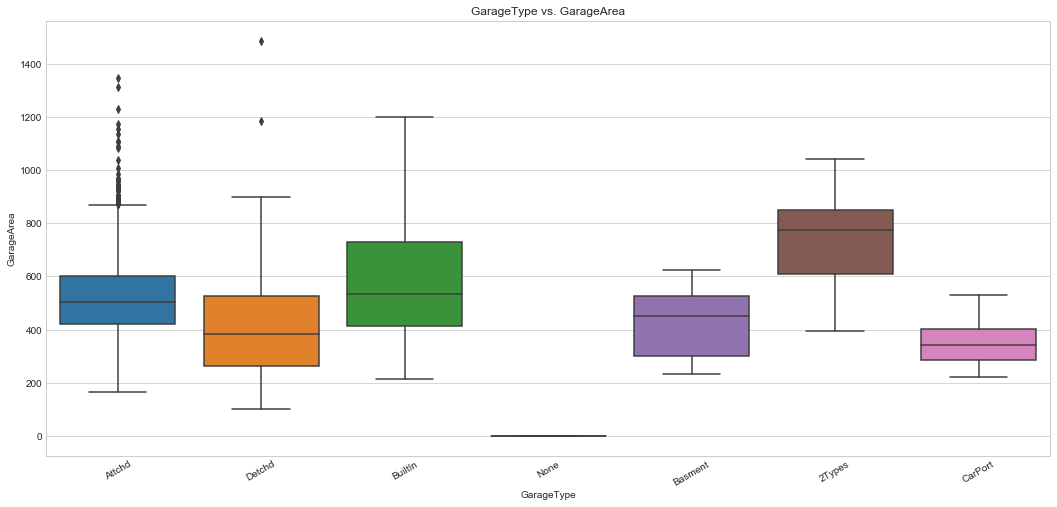

In [1204]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.boxplot(x="GarageType", y="GarageArea", data = te_df)
plt.xticks(rotation=30)
plt.title("GarageType vs. GarageArea")
plt.show()

In [1205]:
index3 = te_df["GarageType"]=="Detchd"
te_df.loc[index3,"GarageArea"].median()

384.0

In [1206]:
te_df["GarageArea"].fillna(384, inplace=True)

### GarageCars - Size of the garage in car capacity 

There is only one missing value in the test set. The missing value is equivalent to the GarageArea we had earlier. Thus, we will fill in the value condinally based on the median number of cars that fit into a Detached garage.

In [1207]:
te_df["GarageCars"].isnull().sum()

1

In [1208]:
te_df.loc[te_df["GarageCars"].isnull(), "GarageType"]

1116    Detchd
Name: GarageType, dtype: object

In [1209]:
te_df.loc[index3, "GarageCars"].median()

1.0

In [1210]:
te_df["GarageCars"].fillna(1, inplace=True)

In [1211]:
te_df["GarageCars"] = te_df["GarageCars"].astype(int)

### Electrical - Electrical system

Finally, we have this variable that has one missing value in the train set. I will use the mode to impute the missing value. 

In [1212]:
tr_df["Electrical"].isnull().sum()

1

In [1213]:
tr_df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [1214]:
tr_df["Electrical"].fillna("SBrKr", inplace=True)

## Are all the missing values filled?

In [1215]:
tr_df.isnull().values.any()

False

In [1216]:
### Do some plotting, see what we are dealing with, remove corplots first... see what can be done on feature creation..

# 2.7. 

### MSSubclass - Converting numeric to nominal attribute

The MSubclass attribute is numeric, however after inspecting the data set description we can see that it is a categorical (nominal) variable. Thus, it is neccessary to label encode it as such. 

In [1217]:
tr_df = tr_df.replace ({"MSSubClass":  { 20:"MSubClass20", 30:"MSubClass30", 40:"MSubClass40", 45:"MSubClass45", 50:"MSubClass50", 60:"MSubClass60", 70:"MSubClass70", 75:"MSubClass75", 80:"MSubClass80", 85:"MSubClass85", 90:"MSubClass90", 120:"MSubClass120", 150:"MSubClass150", 160:"MSubClass160", 180:"MSubClass180", 190:"MSubClass190" }})
te_df = te_df.replace({"MSSubClass":  { 20:"MSubClass20", 30:"MSubClass30", 40:"MSubClass40", 45:"MSubClass45", 50:"MSubClass50", 60:"MSubClass60", 70:"MSubClass70", 75:"MSubClass75", 80:"MSubClass80", 85:"MSubClass85", 90:"MSubClass90", 120:"MSubClass120", 150:"MSubClass150", 160:"MSubClass160", 180:"MSubClass180", 190:"MSubClass190" }})

### Converting nominal to ordinal 

There are a number of attributes that are ordinal in nature, but are encoded as nominal features. 

In [1218]:
tr_df = tr_df.replace ({"LandSlope" : {"Sev":1, "Mod":2, "Gtl":3}, 
                       "ExterQual" : {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "ExterCond" : {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "BsmtQual" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "BsmtCond" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "BsmtExposure" : {"None":0, "No":0, "Mn":1, "Av":2, "Gd":3}, 
                       "KitchenQual": {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "Functional" : {"Sal":1, "Sev":2, "Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8}, 
                       "FireplaceQu" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "BsmtFinType1" : {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}, 
                       "BsmtFinType2" : {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}, 
                       "HeatingQC" : {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "Fence" : {"None":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4},
                       "GarageFinish" : {"None":0, "Unf":1, "RFn":2, "Fin":3}, 
                       "GarageQual" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "GarageCond" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "PavedDrive" : {"N":0, "P":1, "Y":2}, 
                       "PoolQC" : {"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
                       "Street" : {"Grvl":1, "Pave":2}, 
                       "Alley" : {"None":0, "Grvl":1, "Pave":2}})

In [1219]:
te_df = te_df.replace ({"LandSlope" : {"Sev":1, "Mod":2, "Gtl":3}, 
                       "ExterQual" : {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "ExterCond" : {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "BsmtQual" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "BsmtCond" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "BsmtExposure" : {"None":0, "No":0, "Mn":1, "Av":2, "Gd":3}, 
                       "KitchenQual": {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "Functional" : {"Sal":1, "Sev":2, "Maj2":3, "Maj1":4, "Mod":5, "Min2":6, "Min1":7, "Typ":8}, 
                       "FireplaceQu" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "BsmtFinType1" : {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}, 
                       "BsmtFinType2" : {"None":0, "Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6}, 
                       "HeatingQC" : {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "Fence" : {"None":0, "MnWw":1, "GdWo":2, "MnPrv":3, "GdPrv":4},
                       "GarageFinish" : {"None":0, "Unf":1, "RFn":2, "Fin":3}, 
                       "GarageQual" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "GarageCond" : {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}, 
                       "PavedDrive" : {"N":0, "P":1, "Y":2}, 
                       "PoolQC" : {"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
                       "Street" : {"Grvl":1, "Pave":2}, 
                       "Alley" : {"None":0, "Grvl":1, "Pave":2}})

In [1220]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-

# 2.8. Inspecting numerical variables

## 2.8.1 Heatmap

As the graph gets cluttered given the number of variables, I have excluded a few numeric variables that do not seem to be significantly correlated with any other variable in order to make the graph more readable. 

In [1221]:
frames = ['LotFrontage', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
         'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
         'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MiscVal', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
         '3SsnPorch', 'ScreenPorch', 'PoolArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 
         'GarageYrBlt']
num = tr_df[frames]
numeric_vars = pd.concat([num, y], axis=1)

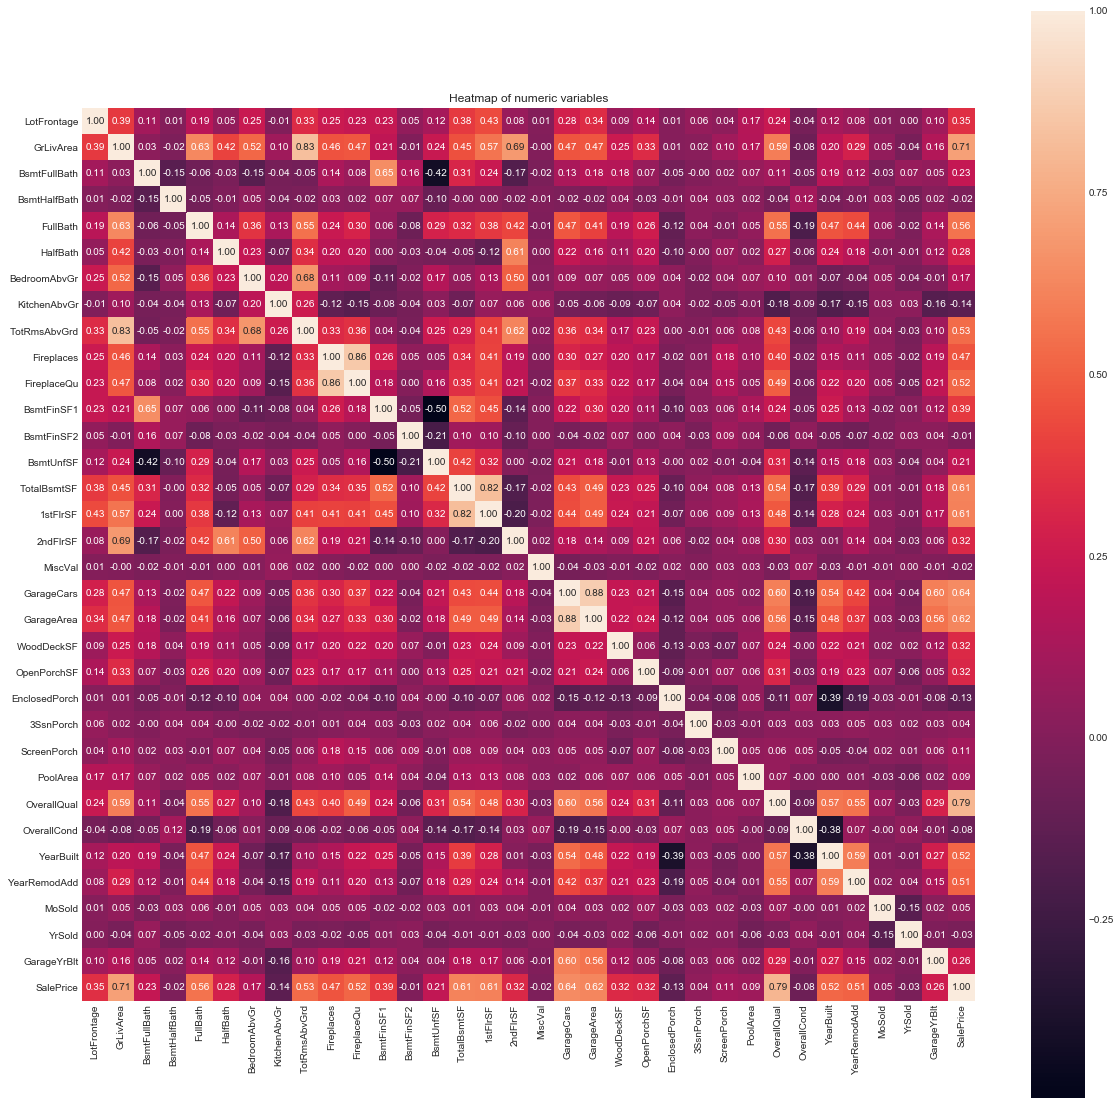

In [1222]:
corr = numeric_vars.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=1, square=True, annot=True, fmt='.2f')
plt.title("Heatmap of numeric variables")
plt.show()

Here I am interested to detect cases where potential multicolinearity may exist. If there exists another variable that contains the same information it may be reasonable to remove one which has the lower correlation with the response variable. There are a few correlations that jump out: 

GarageArea and GarageCars - 0.88.    
Fireplace and FireplaceQu - 0.86.   
GrLivArea and TotRmsAbvGrd - 0.83.   
1stFlSF and TotalBsmtSF - 0.82.   
GrLivArea and 2ndFlSF - 0.69.    

If more cars can fit into a garage it means that the area is bigger. 
If there are more total rooms above the ground floor it means that the living area is larger.
The greater the first floor area the greater the total basement area. 
The greater the second floor area the greater the living area. 


### Heatmap focused on garage variables

In [1223]:
frames2 = ['GarageQual', 'GarageCond', 'GarageFinish', 'GarageArea', "GarageCars", 'GarageYrBlt', "YearBuilt"]
num2 = tr_df[frames2]
numeric_vars2 = pd.concat([num2, y], axis=1)

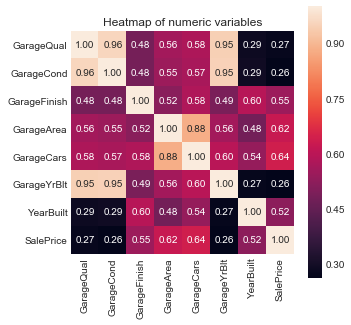

In [1224]:
corr2 = numeric_vars2.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr2, vmax=1, square=True, annot=True, fmt='.2f')
plt.title("Heatmap of numeric variables")
plt.show()

Here, we can observe that the variables GarageCond and GarageQual also have the same information. Moreover, GarageYrBlt is highly correlated with both GarageCond and GarageQual. Thus, two of them needs to be dropped. GarageQual has the highest correlation with SalePrice and will be kept, while the other two will be dropped.

### Heatmap focused on basement variables

In [1225]:
frames3 = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
num3 = tr_df[frames3]
numeric_vars3 = pd.concat([num3, y], axis=1)

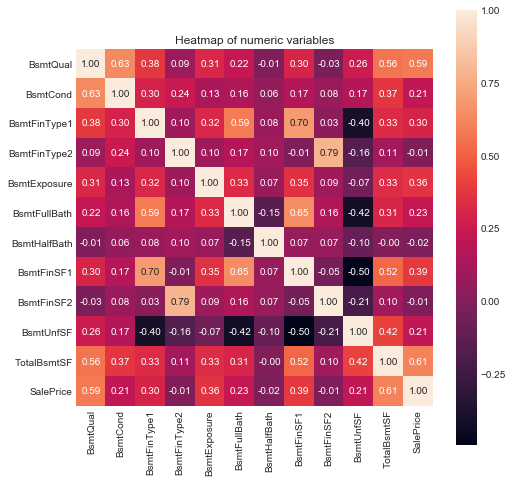

In [1226]:
corr3 = numeric_vars3.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr3, vmax=1, square=True, annot=True, fmt='.2f')
plt.title("Heatmap of numeric variables")
plt.show()

We can note a high correlation between BsmtFinType2 and BsmtFinSF2 (0.79) and BsmtFinType1 and BsmtFinSF1 (0.72). BsmtFinType2 will be dropped as is not correlated with SalePrice, and  BsmtFinType1 will also be dropped as its correlation with SalePrice is smaller than for BsmtFinSF1.

### Heatmap focused on Porch variables

In [1227]:
frames4 = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
num4 = tr_df[frames4]
numeric_vars4 = pd.concat([num4, y], axis=1)

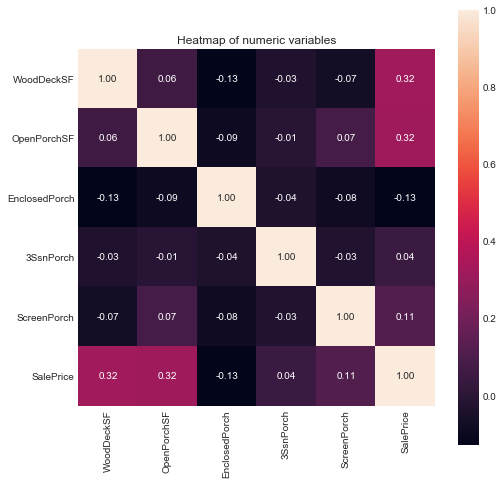

In [1228]:
corr4 = numeric_vars4.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr4, vmax=1, square=True, annot=True, fmt='.2f')
plt.title("Heatmap of numeric variables")
plt.show()

These variables seem to be poorely related to SalePrice. They could be aggregated.

## 2.8.2 Correlation of numeric variables with the target 

In [1229]:
frames5 = ['LotFrontage', 'LotArea','GrLivArea', 'MasVnrArea', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
         'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
         'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MiscVal', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
         '3SsnPorch', 'ScreenPorch', 'PoolArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 
         'GarageYrBlt', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'KitchenQual', 'Functional',
          'FireplaceQu', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Fence', 'GarageFinish', 'GarageQual', 'GarageCond', 
          'PavedDrive', 'PoolQC', 'Street', 'Alley']
num5 = tr_df[frames5]
numeric_vars5 = pd.concat([num5, y], axis=1)

In [1230]:
corr5 = numeric_vars5.corr()

In [1231]:
corr5["SalePrice"].sort_values(ascending=False).round(2)

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
ExterQual        0.68
KitchenQual      0.66
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
BsmtQual         0.59
FullBath         0.56
GarageFinish     0.55
TotRmsAbvGrd     0.53
YearBuilt        0.52
FireplaceQu      0.52
FireplaceQu      0.52
YearRemodAdd     0.51
MasVnrArea       0.47
Fireplaces       0.47
HeatingQC        0.43
BsmtFinSF1       0.39
BsmtExposure     0.36
LotFrontage      0.35
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
BsmtFinType1     0.30
HalfBath         0.28
GarageQual       0.27
LotArea          0.26
GarageCond       0.26
GarageYrBlt      0.26
PavedDrive       0.23
BsmtFullBath     0.23
BsmtUnfSF        0.21
BsmtCond         0.21
BedroomAbvGr     0.17
PoolQC           0.12
ScreenPorch      0.11
Functional       0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
Street           0.04
ExterCond        0.02
BsmtFinTyp

Here we gain insight as to what variables would best predict the SalesPrice of a house. We can see that OveralQual and GrLivArea are the best predictors of the SalesPrice. On the other hand, there are many variables that do not seem to be relevant in predicting the SalesPrice as they are not linearly correlated.

## 2.8.3 Plots of the highly correlated numeric variables

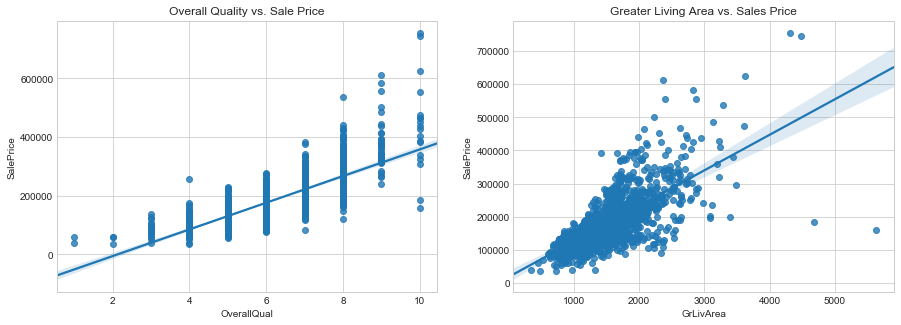

In [1232]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = 'OverallQual', y = y["SalePrice"], data = tr_df)
plt.title("Overall Quality vs. Sale Price")

plt.subplot(1, 2, 2)
sns.regplot(x = 'GrLivArea', y = y["SalePrice"], data = tr_df)
plt.title("Greater Living Area vs. Sales Price")
plt.show()

We can clearly see that the greater the overall quality of a house the greater the sales price. On the other hand, a greater living area generally leads to a higher sales price. However, we can notice a few outliers which include the houses that have a living area above 4000 squared feet and that are priced both unusually low and unusually high. It is wise to remove those outliers. 

### Dropping Outliers

In [1233]:
tr_df = tr_df.drop(tr_df[tr_df["GrLivArea"]>4000].index)

In [1234]:
tr_df = tr_df.reset_index()

In [1235]:
tr_df = tr_df.drop('index', axis=1)

In [1236]:
y = y.drop(y.index[523])

In [1237]:
y = y.drop(y.index[691])
y = y.drop(y.index[1182])
y = y.drop(y.index[1298])

In [1238]:
y = y.reset_index()

In [1239]:
y = y.drop('index', axis=1)

### More plots of correlated numeric variables 

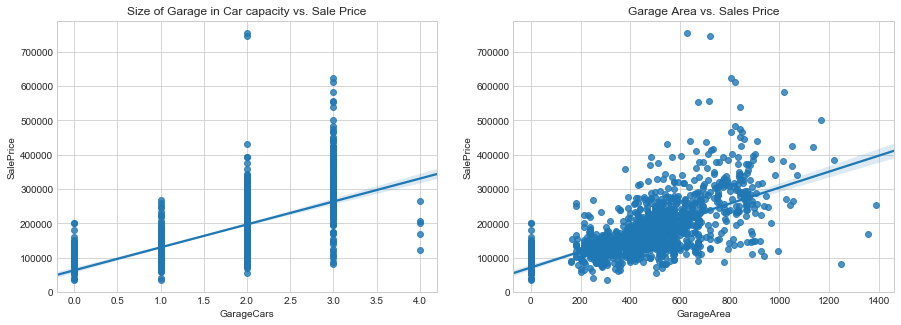

In [1240]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = 'GarageCars', y = y["SalePrice"], data = tr_df)
plt.title("Size of Garage in Car capacity vs. Sale Price")

plt.subplot(1, 2, 2)
sns.regplot(x = 'GarageArea', y = y["SalePrice"], data = tr_df)
plt.title("Garage Area vs. Sales Price")
plt.show()

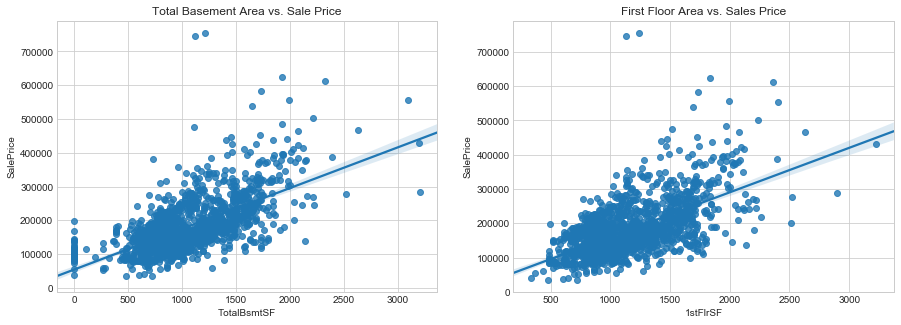

In [1241]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.regplot(x = 'TotalBsmtSF', y = y["SalePrice"], data = tr_df)
plt.title("Total Basement Area vs. Sale Price")

plt.subplot(1, 2, 2)
sns.regplot(x = '1stFlrSF', y = y["SalePrice"], data = tr_df)
plt.title("First Floor Area vs. Sales Price")
plt.show()

In both of these plots we can see a nice linear relationship. 

### For the rest of the variables we will do a pairplot

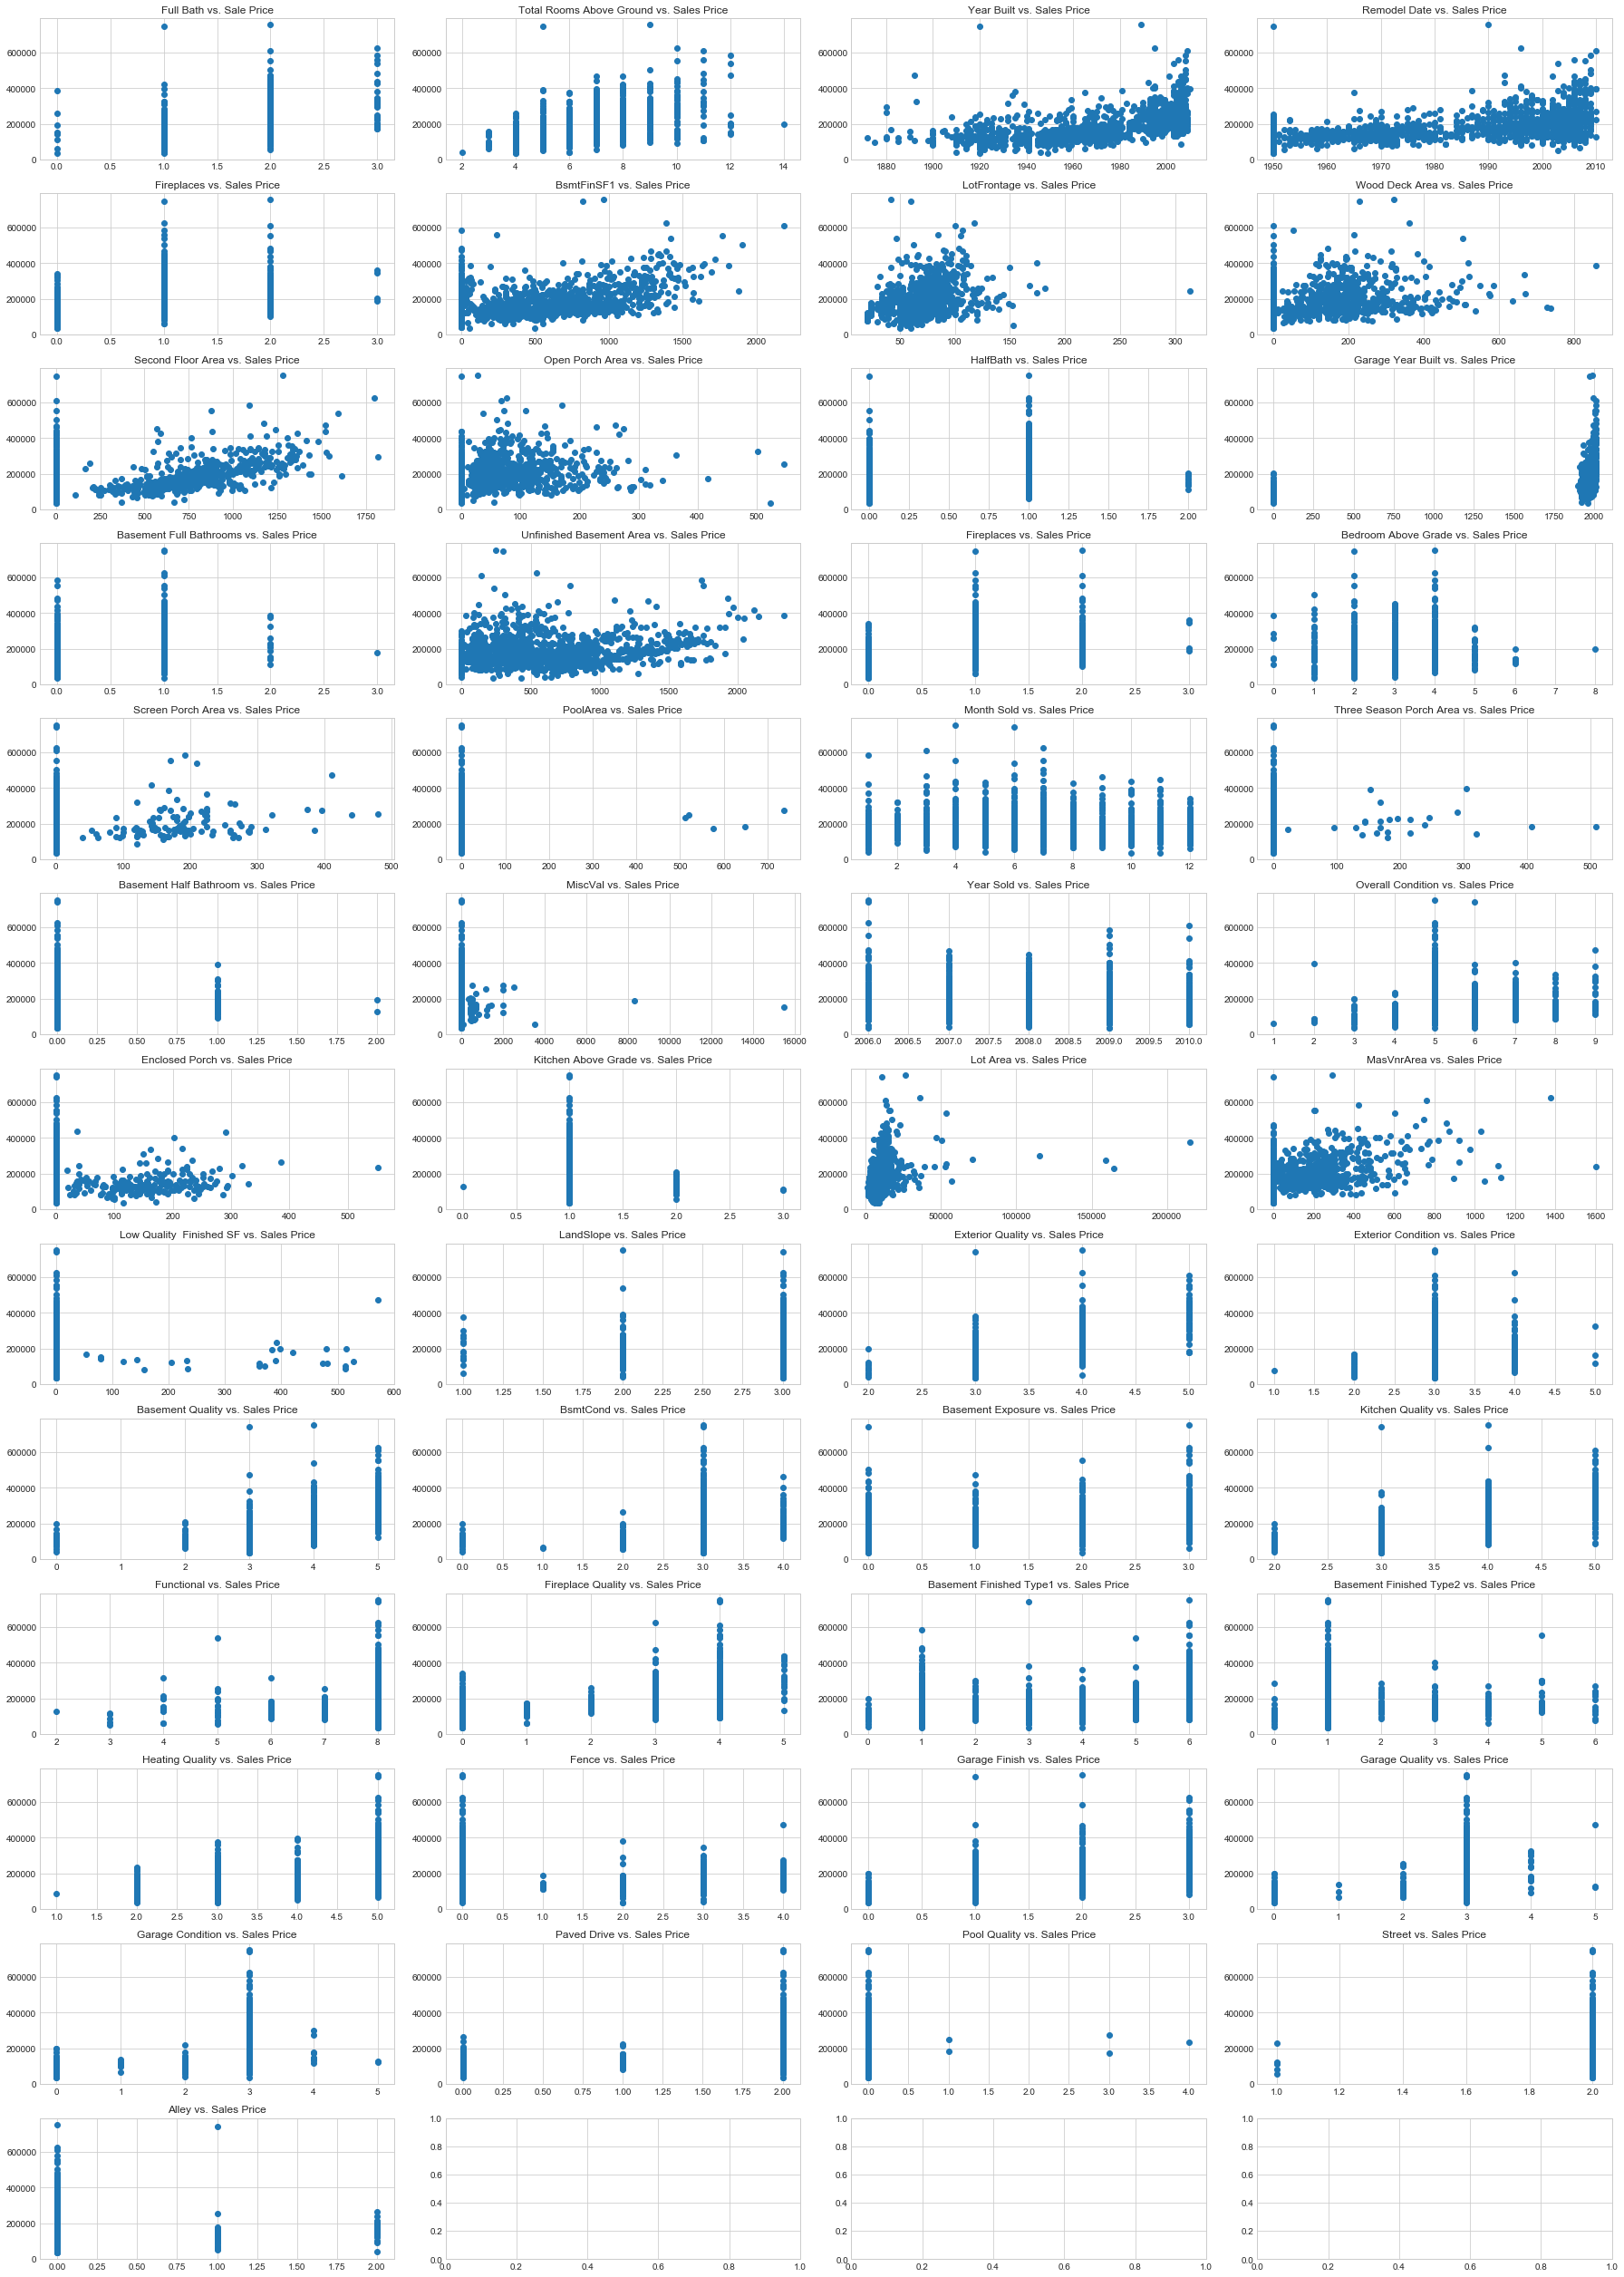

In [1242]:
fig, ax = plt.subplots(13, 4, figsize=(25, 35))

ax[0,0].scatter(x = 'FullBath', y = y["SalePrice"], data = tr_df)
ax[0,0].set_title("Full Bath vs. Sale Price")
ax[0,0].can_zoom

ax[0,1].scatter(x = 'TotRmsAbvGrd', y = y["SalePrice"], data = tr_df)
ax[0,1].set_title("Total Rooms Above Ground vs. Sales Price")

ax[0,2].scatter(x = 'YearBuilt', y = y["SalePrice"], data = tr_df)
ax[0,2].set_title("Year Built vs. Sales Price")

ax[0,3].scatter(x = 'YearRemodAdd', y = y["SalePrice"], data = tr_df)
ax[0,3].set_title("Remodel Date vs. Sales Price")

ax[1,0].scatter(x = 'Fireplaces', y = y["SalePrice"], data = tr_df)
ax[1,0].set_title("Fireplaces vs. Sales Price")

ax[1,1].scatter(x = 'BsmtFinSF1', y = y["SalePrice"], data = tr_df)
ax[1,1].set_title("BsmtFinSF1 vs. Sales Price")

ax[1,2].scatter(x = 'LotFrontage', y = y["SalePrice"], data = tr_df)
ax[1,2].set_title("LotFrontage vs. Sales Price")

ax[1,3].scatter(x = 'WoodDeckSF', y = y["SalePrice"], data = tr_df)
ax[1,3].set_title("Wood Deck Area vs. Sales Price")

ax[2,0].scatter(x = '2ndFlrSF', y = y["SalePrice"], data = tr_df)
ax[2,0].set_title("Second Floor Area vs. Sales Price")

ax[2,1].scatter(x = 'OpenPorchSF', y = y["SalePrice"], data = tr_df)
ax[2,1].set_title("Open Porch Area vs. Sales Price")

ax[2,2].scatter(x = 'HalfBath', y = y["SalePrice"], data = tr_df)
ax[2,2].set_title("HalfBath vs. Sales Price")

ax[2,3].scatter(x = 'GarageYrBlt', y = y["SalePrice"], data = tr_df)
ax[2,3].set_title("Garage Year Built vs. Sales Price")

ax[3,0].scatter(x = 'BsmtFullBath', y = y["SalePrice"], data = tr_df)
ax[3,0].set_title("Basement Full Bathrooms vs. Sales Price")

ax[3,1].scatter(x = 'BsmtUnfSF', y = y["SalePrice"], data = tr_df)
ax[3,1].set_title("Unfinished Basement Area vs. Sales Price")

ax[3,2].scatter(x = 'Fireplaces', y = y["SalePrice"], data = tr_df)
ax[3,2].set_title("Fireplaces vs. Sales Price")

ax[3,3].scatter(x = 'BedroomAbvGr', y = y["SalePrice"], data = tr_df)
ax[3,3].set_title("Bedroom Above Grade vs. Sales Price")

ax[4,0].scatter(x = 'ScreenPorch', y = y["SalePrice"], data = tr_df)
ax[4,0].set_title("Screen Porch Area vs. Sales Price")

ax[4,1].scatter(x = 'PoolArea', y = y["SalePrice"], data = tr_df)
ax[4,1].set_title("PoolArea vs. Sales Price")

ax[4,2].scatter(x = 'MoSold', y = y["SalePrice"], data = tr_df)
ax[4,2].set_title("Month Sold vs. Sales Price")

ax[4,3].scatter(x = '3SsnPorch', y = y["SalePrice"], data = tr_df)
ax[4,3].set_title("Three Season Porch Area vs. Sales Price")

ax[5,0].scatter(x = 'BsmtHalfBath', y = y["SalePrice"], data = tr_df)
ax[5,0].set_title("Basement Half Bathroom vs. Sales Price")

ax[5,1].scatter(x = 'MiscVal', y = y["SalePrice"], data = tr_df)
ax[5,1].set_title("MiscVal vs. Sales Price")

ax[5,2].scatter(x = 'YrSold', y = y["SalePrice"], data = tr_df)
ax[5,2].set_title("Year Sold vs. Sales Price")

ax[5,3].scatter(x = 'OverallCond', y = y["SalePrice"], data = tr_df)
ax[5,3].set_title("Overall Condition vs. Sales Price")

ax[6,0].scatter(x = 'EnclosedPorch', y = y["SalePrice"], data = tr_df)
ax[6,0].set_title("Enclosed Porch vs. Sales Price")

ax[6,1].scatter(x = 'KitchenAbvGr', y = y["SalePrice"], data = tr_df)
ax[6,1].set_title("Kitchen Above Grade vs. Sales Price")

ax[6,2].scatter(x = 'LotArea', y = y["SalePrice"], data = tr_df)
ax[6,2].set_title("Lot Area vs. Sales Price")

ax[6,3].scatter(x = 'MasVnrArea', y = y["SalePrice"], data = tr_df)
ax[6,3].set_title("MasVnrArea vs. Sales Price")

ax[7,0].scatter(x = 'LowQualFinSF', y = y["SalePrice"], data = tr_df)
ax[7,0].set_title("Low Quality  Finished SF vs. Sales Price")

ax[7,1].scatter(x = 'LandSlope', y = y["SalePrice"], data = tr_df)
ax[7,1].set_title("LandSlope vs. Sales Price")

ax[7,2].scatter(x = 'ExterQual', y = y["SalePrice"], data = tr_df)
ax[7,2].set_title("Exterior Quality vs. Sales Price")

ax[7,3].scatter(x = 'ExterCond', y = y["SalePrice"], data = tr_df)
ax[7,3].set_title("Exterior Condition vs. Sales Price")

ax[8,0].scatter(x = 'BsmtQual', y = y["SalePrice"], data = tr_df)
ax[8,0].set_title("Basement Quality vs. Sales Price")

ax[8,1].scatter(x = 'BsmtCond', y = y["SalePrice"], data = tr_df)
ax[8,1].set_title("BsmtCond vs. Sales Price")

ax[8,2].scatter(x = 'BsmtExposure', y = y["SalePrice"], data = tr_df)
ax[8,2].set_title("Basement Exposure vs. Sales Price")

ax[8,3].scatter(x = 'KitchenQual', y = y["SalePrice"], data = tr_df)
ax[8,3].set_title("Kitchen Quality vs. Sales Price")

ax[9,0].scatter(x = 'Functional', y = y["SalePrice"], data = tr_df)
ax[9,0].set_title("Functional vs. Sales Price")

ax[9,1].scatter(x = 'FireplaceQu', y = y["SalePrice"], data = tr_df)
ax[9,1].set_title("Fireplace Quality vs. Sales Price")

ax[9,2].scatter(x = 'BsmtFinType1', y = y["SalePrice"], data = tr_df)
ax[9,2].set_title("Basement Finished Type1 vs. Sales Price")

ax[9,3].scatter(x = 'BsmtFinType2', y = y["SalePrice"], data = tr_df)
ax[9,3].set_title("Basement Finished Type2 vs. Sales Price")

ax[10,0].scatter(x = 'HeatingQC', y = y["SalePrice"], data = tr_df)
ax[10,0].set_title("Heating Quality vs. Sales Price")

ax[10,1].scatter(x = 'Fence', y = y["SalePrice"], data = tr_df)
ax[10,1].set_title("Fence vs. Sales Price")

ax[10,2].scatter(x = 'GarageFinish', y = y["SalePrice"], data = tr_df)
ax[10,2].set_title("Garage Finish vs. Sales Price")

ax[10,3].scatter(x = 'GarageQual', y = y["SalePrice"], data = tr_df)
ax[10,3].set_title("Garage Quality vs. Sales Price")

ax[11,0].scatter(x = 'GarageCond', y = y["SalePrice"], data = tr_df)
ax[11,0].set_title("Garage Condition vs. Sales Price")

ax[11,1].scatter(x = 'PavedDrive', y = y["SalePrice"], data = tr_df)
ax[11,1].set_title("Paved Drive vs. Sales Price")

ax[11,2].scatter(x = 'PoolQC', y = y["SalePrice"], data = tr_df)
ax[11,2].set_title("Pool Quality vs. Sales Price")

ax[11,3].scatter(x = 'Street', y = y["SalePrice"], data = tr_df)
ax[11,3].set_title("Street vs. Sales Price")

ax[12,0].scatter(x = 'Alley', y = y["SalePrice"], data = tr_df)
ax[12,0].set_title("Alley vs. Sales Price")

plt.tight_layout() 
plt.show()

Here I notice that month should be treated as a nominal variable instead of ordinal, as it is hard to say that February has a higher value than January. They could also be binned. 

### Visualizing Nominal Variables

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


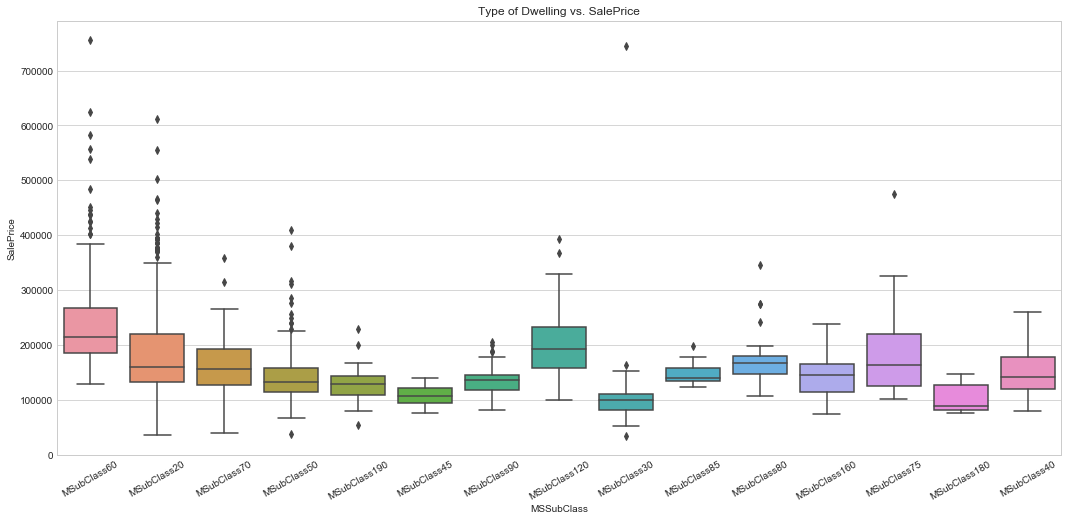

In [1243]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.boxplot(x="MSSubClass", y=y["SalePrice"], data = tr_df)
plt.xticks(rotation=30)
plt.title("Type of Dwelling vs. SalePrice")
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


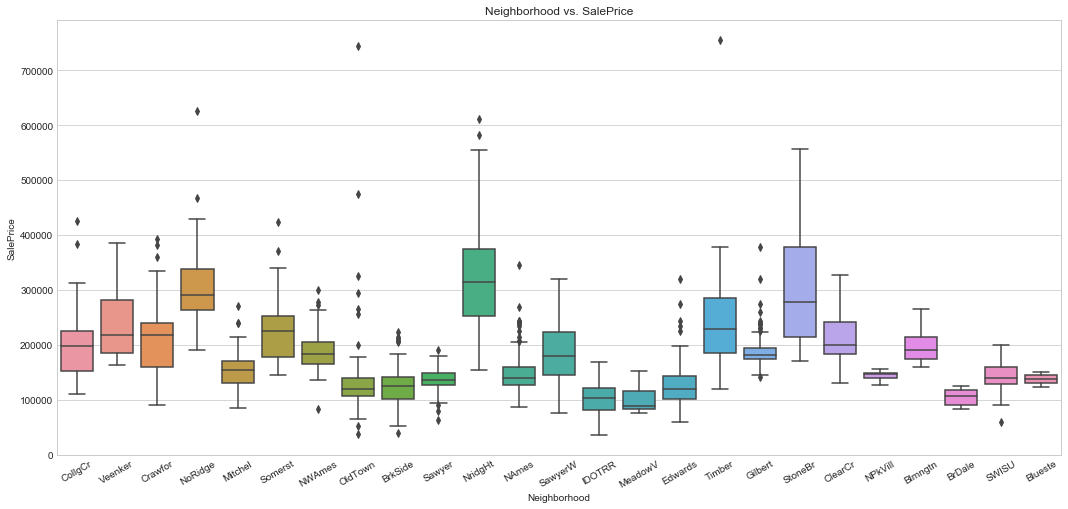

In [1244]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,8))
ax = sns.boxplot(x='Neighborhood', y=y["SalePrice"], data = tr_df)
plt.xticks(rotation=30)
plt.title("Neighborhood vs. SalePrice")
plt.show()

There are relatively many categories here, instead we could bin them based on how they affect the price and reduce the number of categories.

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


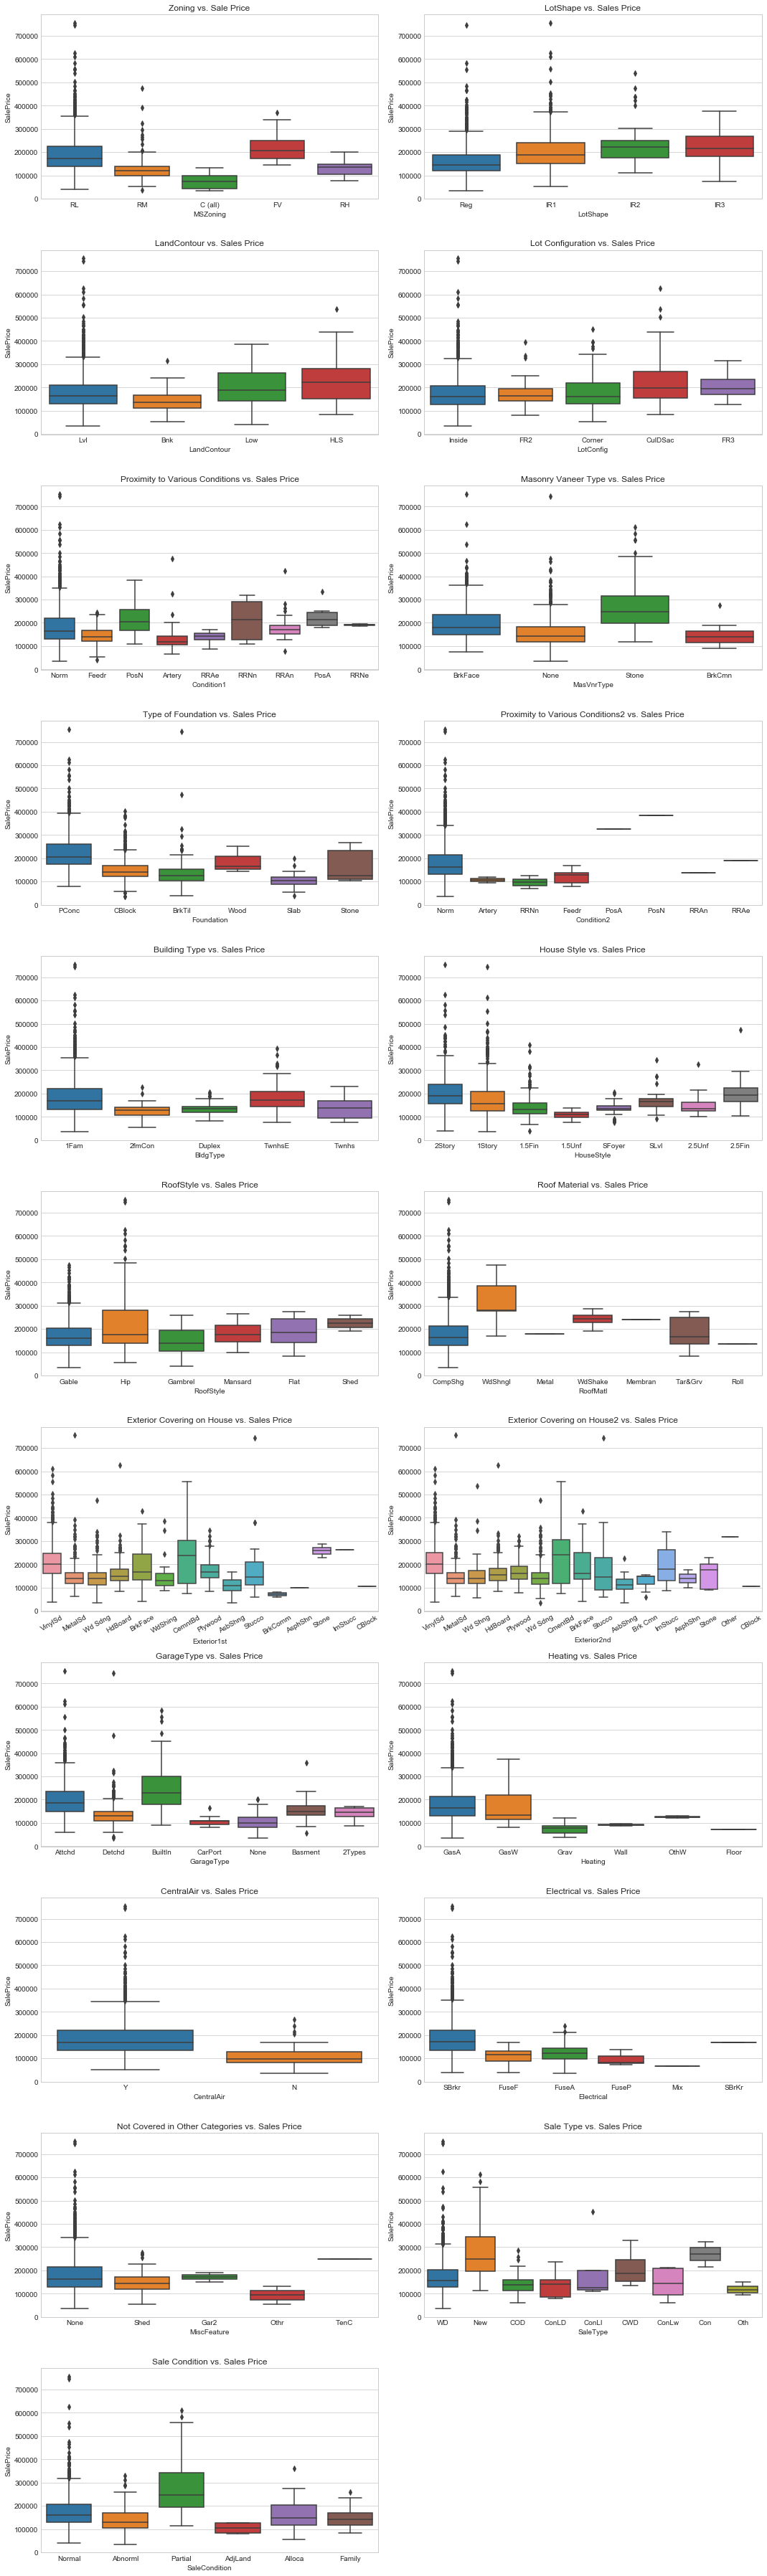

In [1245]:
fig, ax = plt.subplots(figsize=(15, 50))
plt.subplot(11, 2, 1)
sns.boxplot(x = 'MSZoning', y= y["SalePrice"], data = tr_df)
plt.title("Zoning vs. Sale Price")

plt.subplot(11, 2, 2)
sns.boxplot(x = 'LotShape', y = y["SalePrice"], data = tr_df)
plt.title("LotShape vs. Sales Price")

plt.subplot(11, 2, 3)
sns.boxplot(x = 'LandContour', y = y["SalePrice"], data = tr_df)
plt.title("LandContour vs. Sales Price")

plt.subplot(11, 2, 4)
sns.boxplot(x = 'LotConfig', y = y["SalePrice"], data = tr_df)
plt.title("Lot Configuration vs. Sales Price")

plt.subplot(11, 2, 5)
sns.boxplot(x = 'Condition1', y = y["SalePrice"], data = tr_df)
plt.title("Proximity to Various Conditions vs. Sales Price")

plt.subplot(11, 2, 6)
sns.boxplot(x = 'MasVnrType', y = y["SalePrice"], data = tr_df)
plt.title("Masonry Vaneer Type vs. Sales Price")

plt.subplot(11, 2, 7)
sns.boxplot(x = 'Foundation', y = y["SalePrice"], data = tr_df)
plt.title("Type of Foundation vs. Sales Price")

plt.subplot(11, 2, 8)
sns.boxplot(x = 'Condition2', y = y["SalePrice"], data = tr_df)
plt.title("Proximity to Various Conditions2 vs. Sales Price")

plt.subplot(11, 2, 9)
sns.boxplot(x = 'BldgType', y = y["SalePrice"], data = tr_df)
plt.title("Building Type vs. Sales Price")

plt.subplot(11, 2, 10)
sns.boxplot(x = 'HouseStyle', y = y["SalePrice"], data = tr_df)
plt.title("House Style vs. Sales Price")

plt.subplot(11, 2, 11)
sns.boxplot(x = 'RoofStyle', y = y["SalePrice"], data = tr_df)
plt.title("RoofStyle vs. Sales Price")

plt.subplot(11, 2, 12)
sns.boxplot(x = 'RoofMatl', y = y["SalePrice"], data = tr_df)
plt.title("Roof Material vs. Sales Price")

plt.subplot(11, 2, 13)
sns.boxplot(x = 'Exterior1st', y = y["SalePrice"], data = tr_df)
plt.title("Exterior Covering on House vs. Sales Price")
plt.xticks(rotation=30)

plt.subplot(11, 2, 14)
sns.boxplot(x = 'Exterior2nd', y = y["SalePrice"], data = tr_df)
plt.title("Exterior Covering on House2 vs. Sales Price")
plt.xticks(rotation=30)

plt.subplot(11, 2, 15)
sns.boxplot(x = 'GarageType', y = y["SalePrice"], data = tr_df)
plt.title("GarageType vs. Sales Price")

plt.subplot(11, 2, 16)
sns.boxplot(x = 'Heating', y = y["SalePrice"], data = tr_df)
plt.title("Heating vs. Sales Price")

plt.subplot(11, 2, 17)
sns.boxplot(x = 'CentralAir', y = y["SalePrice"], data = tr_df)
plt.title("CentralAir vs. Sales Price")

plt.subplot(11, 2, 18)
sns.boxplot(x = 'Electrical', y = y["SalePrice"], data = tr_df)
plt.title("Electrical vs. Sales Price")

plt.subplot(11, 2, 19)
sns.boxplot(x = 'MiscFeature', y = y["SalePrice"], data = tr_df)
plt.title("Not Covered in Other Categories vs. Sales Price")

plt.subplot(11, 2, 20)
sns.boxplot(x = 'SaleType', y = y["SalePrice"], data = tr_df)
plt.title("Sale Type vs. Sales Price")

plt.subplot(11, 2, 21)
sns.boxplot(x = 'SaleCondition', y = y["SalePrice"], data = tr_df)
plt.title("Sale Condition vs. Sales Price")
plt.tight_layout()
plt.show()

Some of the nominal variables seem to be related to SalePrice, however most less so. 

# 3. Feature Engineering

## 3.1 TotalSF - Total Area

Before dropping highly correlated variables it would make sense to think which features can be combined or created. For instance, creating a total area variable would make sense - we can combine GrLivArea and TotalBsmtSF. 

In [1246]:
tr_df["TotalSF"] = tr_df["GrLivArea"] + tr_df['TotalBsmtSF']
te_df["TotalSF"] = te_df["GrLivArea"] + te_df['TotalBsmtSF']

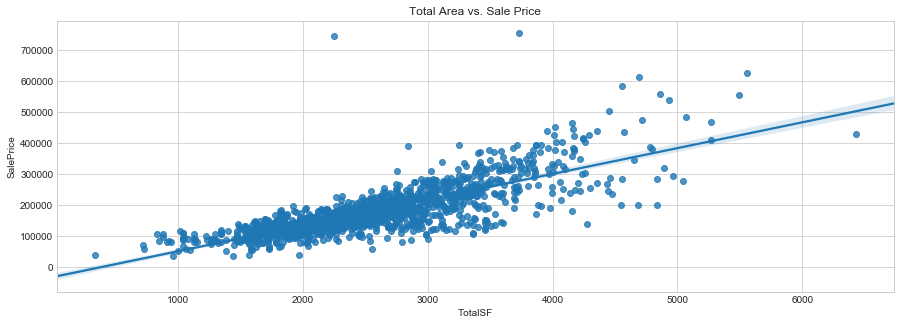

In [1247]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x = 'TotalSF', y = y["SalePrice"], data = tr_df)
plt.title("Total Area vs. Sale Price")
plt.show()

## 3.2. TotalBath - Total Number of Bathrooms

There are four bathroom variables - BsmtFullBath, BsmtHalfBath, FullBath, and HalfBath. It makes sense to aggregate them into one single variable. 

In [1248]:
tr_df['TotalBath'] = tr_df["FullBath"] + (0.5 * tr_df['HalfBath']) + tr_df["BsmtFullBath"] + (0.5 * tr_df["BsmtHalfBath"])
te_df['TotalBath'] = te_df["FullBath"] + (0.5 * te_df['HalfBath']) + te_df["BsmtFullBath"] + (0.5 * te_df["BsmtHalfBath"])

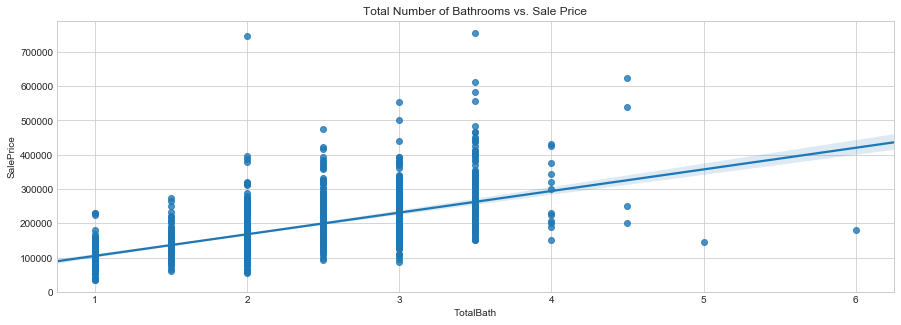

In [1249]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x = 'TotalBath', y = y["SalePrice"], data = tr_df)
plt.title("Total Number of Bathrooms vs. Sale Price")
plt.show()

## 3.3 TotalPorchSF - Adding the area of the porch

There are a few porch variables that can be aggregated: WoodDeckSF, OpenPorchSF, EnclosedSF, 3SsnPorch, ScreenPorch.

In [1250]:
tr_df["TotalPorchSF"] = tr_df['WoodDeckSF'] + tr_df['OpenPorchSF'] + tr_df['EnclosedPorch'] + tr_df['3SsnPorch'] + tr_df['ScreenPorch']
te_df["TotalPorchSF"] = te_df['WoodDeckSF'] + te_df['OpenPorchSF'] + te_df['EnclosedPorch'] + te_df['3SsnPorch'] + te_df['ScreenPorch']

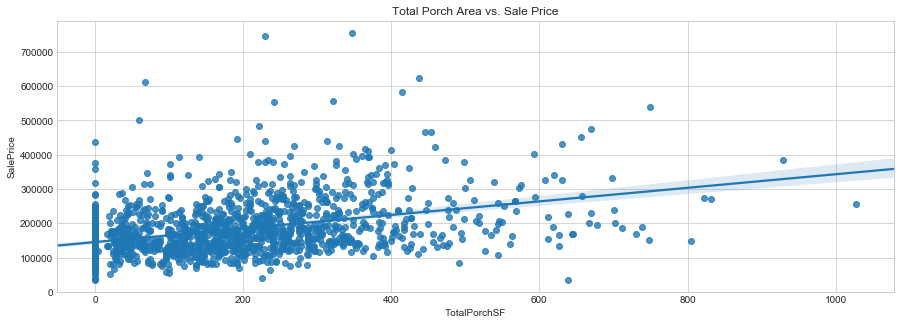

In [1251]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x = 'TotalPorchSF', y = y["SalePrice"], data = tr_df)
plt.title("Total Porch Area vs. Sale Price")
plt.show()

## 3.4. YrBuilt 

This variable could has a very high range, and it would make sense to lower the range. One way to do it, is to create a new variable representing the age of the house. Since the data was collected in 2010, we can substract the year the house was built from 2010.

In [1252]:
tr_df["Age"] = 2010 - tr_df["YearBuilt"]
te_df["Age"] = 2010 - te_df["YearBuilt"]

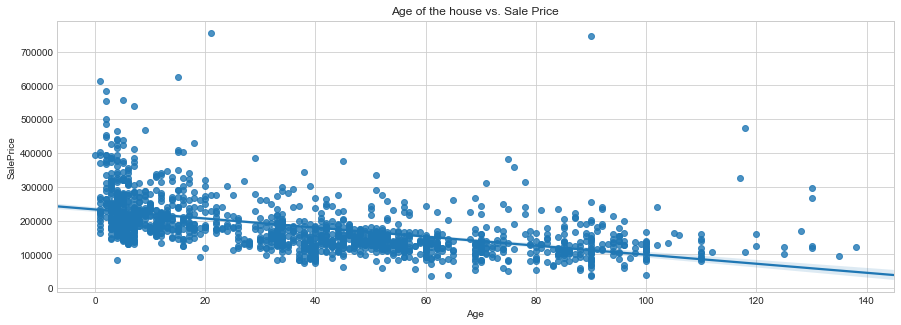

In [1253]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x = 'Age', y = y["SalePrice"], data = tr_df)
plt.title("Age of the house vs. Sale Price")
plt.show()

## 3.5. YrSold and YrRemodAdd

Similar logic as in 3.4. applied to YrSold.

In [1254]:
tr_df["TimeSinceSold"] = 2010 - tr_df["YrSold"]
te_df["TimeSinceSold"] = 2010 - te_df["YrSold"]

In [1255]:
tr_df["TimeSinceRemod"] = 2010 - tr_df["YearRemodAdd"]
te_df["TimeSinceRemod"] = 2010 - te_df["YearRemodAdd"]

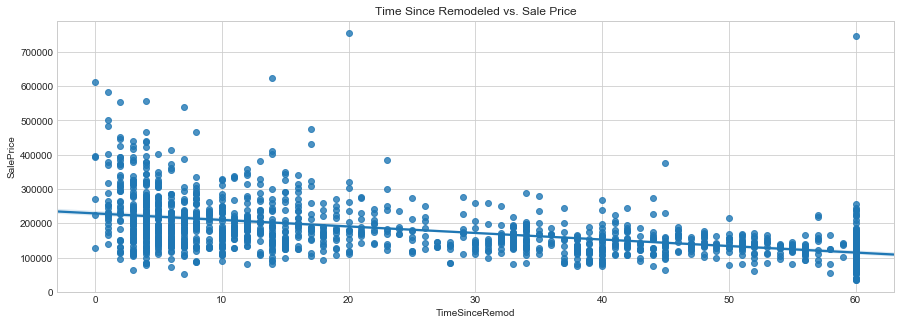

In [1256]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x = 'TimeSinceRemod', y = y["SalePrice"], data = tr_df)
plt.title("Time Since Remodeled vs. Sale Price")
plt.show()

## 3.6. Adding 1stFlSF and 2ndFlSF

In [1257]:
tr_df['1stand2ndFlSF'] = tr_df['1stFlrSF'] + tr_df['2ndFlrSF']
te_df['1stand2ndFlSF'] = te_df['1stFlrSF'] + te_df['2ndFlrSF']

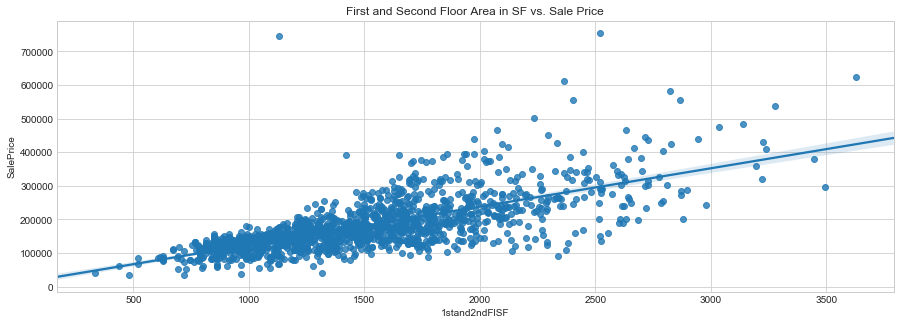

In [1258]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x = '1stand2ndFlSF', y = y["SalePrice"], data = tr_df)
plt.title("First and Second Floor Area in SF vs. Sale Price")
plt.show()

# 4. Looking for correlations for the newly created variables

In [1259]:
frames6 = ['GrLivArea', 'TotalBsmtSF','TotRmsAbvGrd', '1stFlrSF', '2ndFlrSF', '1stand2ndFlSF', 'TotalSF']
num6 = tr_df[frames6]
numeric_vars6 = pd.concat([num6, y], axis=1)

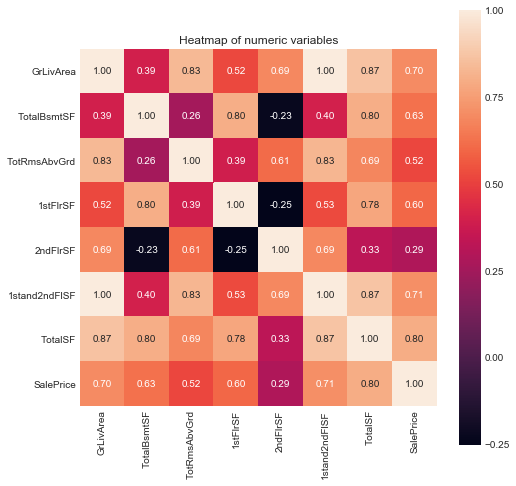

In [1260]:
corr6 = numeric_vars6.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr6, vmax=1, square=True, annot=True, fmt='.2f')
plt.title("Heatmap of numeric variables")
plt.show()

Observations:

- It was a good idea to aggregate GrLivArea and TotalBsmtSF into TotalSF, because as an aggregate they have a stronger correlation with SalePrice (0.8 vs. 0.7 and 0.63). 
- It was a good idea to aggregate 1stFlrSF and 2ndFlrSF into 1stand2sndFlSF for the same reason (0.71 vs. 0.6 and 0.29).
- Thus, we can safely drop: GrLivArea, TotalBsmtSF, 1stFlrSF, and 2ndFlrSF. 
- There is still a relatively strong correlation between TotRmsAbvGrd and TotalSF. Since TotalSF has a higher correlation with the SalePrice, we will keep it. Hence, TotRmsAbvGrd will be dropped.

In [1261]:
frames7 = ['FullBath', 'HalfBath','BsmtFullBath', 'BsmtHalfBath', 'TotalBath']
num7 = tr_df[frames7]
numeric_vars7 = pd.concat([num7, y], axis=1)

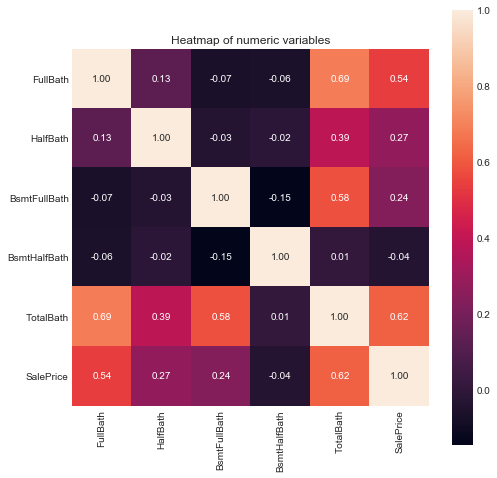

In [1262]:
corr7 = numeric_vars7.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr7, vmax=1, square=True, annot=True, fmt='.2f')
plt.title("Heatmap of numeric variables")
plt.show()

Observation

- We can see that the aggregated variable TotalBath has a higher correlation with SalePrice than any of the individual variables confirming that the aggregation step was a good decision.
- Thus, FullBath, HalfBath, BsmtFullBath, BsmtHalfBath can be dropped.

In [1263]:
frames8 = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'TotalPorchSF']
num8 = tr_df[frames8]
numeric_vars8 = pd.concat([num8, y], axis=1)

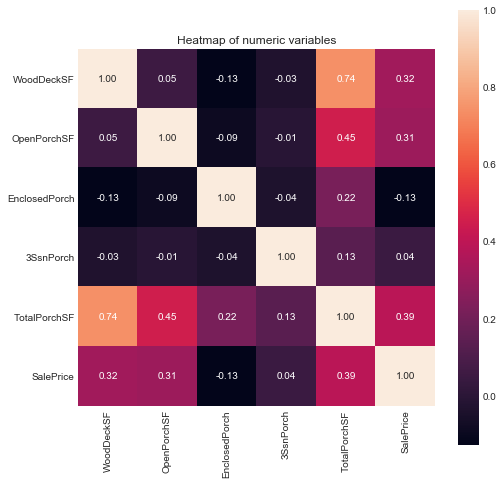

In [1264]:
corr8 = numeric_vars8.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr8, vmax=1, square=True, annot=True, fmt='.2f')
plt.title("Heatmap of numeric variables")
plt.show()

Here again, we can see that TotalPorchSF has a higher correlation with SalePrice than any of the individual components. This assures us that we can drop: WoodDeckSF, OpenPorchSF, EnclosedPorch, and 3SsnPorch. 

#### Check Multicolinearity for Exterior variables 

In [1265]:
frames9 = ['ExterQual', 'ExterCond']
num9 = tr_df[frames9]
numeric_vars9 = pd.concat([num9, y], axis=1)

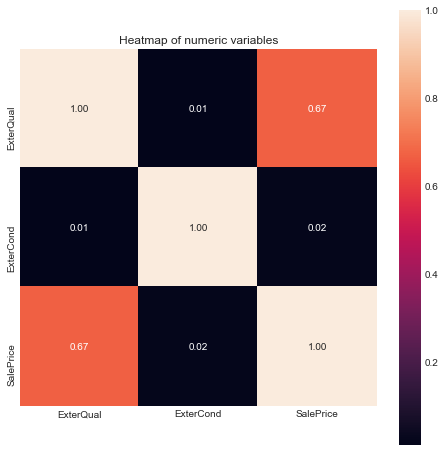

In [1266]:
corr9 = numeric_vars9.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr9, vmax=1, square=True, annot=True, fmt='.2f')
plt.title("Heatmap of numeric variables")
plt.show()

I realized I had forgotten to check if there is any multicolinearity between exterior variables. There does not seem to be any.

# 5. Final preprocessing

## 5.1 Dropping variables 

As we have already identified, there are some predictor variables that are highly correlated with each other. We need to drop them to prevent multicolinearity. Additionally, some of the variables seem not to be correlated at all with the response variable and those can also be dropped.

In [1267]:
tr_df = tr_df.drop(['GarageArea', 'Fireplaces','GrLivArea', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF','TotRmsAbvGrd',
                   'GarageYrBlt', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 'FullBath', 'HalfBath', 'BsmtFullBath',
                   'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'],axis=1)

te_df = te_df.drop(['GarageArea', 'Fireplaces','GrLivArea', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF','TotRmsAbvGrd',
                   'GarageYrBlt', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 'FullBath', 'HalfBath', 'BsmtFullBath',
                   'BsmtHalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'],axis=1)

In [1268]:
tr_df = tr_df.drop(['YearBuilt', 'YrSold', 'YearRemodAdd'], axis=1)
te_df = te_df.drop(['YearBuilt', 'YrSold', 'YearRemodAdd'], axis=1)

## 5.2. Binning MoSold and Neighborhood

In [1269]:
tr_df = tr_df.replace({'MoSold':{1:"Q1", 2:"Q1", 3:"Q1", 4:"Q2", 5:"Q2", 6:"Q2", 7:"Q3", 8:"Q3", 9:"Q3", 
                                    10:"Q4", 11:"Q4", 12:"Q4"}})
te_df = te_df.replace({'MoSold':{1:"Q1", 2:"Q1", 3:"Q1", 4:"Q2", 5:"Q2", 6:"Q2", 7:"Q3", 8:"Q3", 9:"Q3", 
                                    10:"Q4", 11:"Q4", 12:"Q4"}})

tr_df = tr_df.replace({ 'Neighborhood' :{ "MeadowV":"zero",  
        "IDOTRR" : "one",   
        "BrDale" : "one",   
        "OldTown" : "one",  
        "Edwards" : "one",  
        "BrkSide" : "one",  
        "Sawyer" : "one",   
        "Blueste" : "one",  
        "SWISU" : "two",    
        "NAmes" : "two",    
        "NPkVill" : "two",  
        "Mitchel" : "two",  
        "SawyerW" : "two",  
        "Gilbert" : "two",  
        "NWAmes" : "two",   
        "Blmngtn" : "two",  
        "CollgCr" : "two",  
        "ClearCr" : "three", 
        "Crawfor" : "three",  
        "Veenker" : "three",  
        "Somerst" : "three",  
        "Timber" : "three",   
        "StoneBr" : "fourth",  
        "NoRidge" : "fourth",  
        "NridgHt" : "fourth" }}) 

te_df = te_df.replace({ 'Neighborhood' :{ "MeadowV":"zero",  
        "IDOTRR" : "one",   
        "BrDale" : "one",   
        "OldTown" : "one",  
        "Edwards" : "one",  
        "BrkSide" : "one",  
        "Sawyer" : "one",   
        "Blueste" : "one",  
        "SWISU" : "two",    
        "NAmes" : "two",    
        "NPkVill" : "two",  
        "Mitchel" : "two",  
        "SawyerW" : "two",  
        "Gilbert" : "two",  
        "NWAmes" : "two",   
        "Blmngtn" : "two",  
        "CollgCr" : "two",  
        "ClearCr" : "three", 
        "Crawfor" : "three",  
        "Veenker" : "three",  
        "Somerst" : "three",  
        "Timber" : "three",   
        "StoneBr" : "fourth",  
        "NoRidge" : "fourth",  
        "NridgHt" : "fourth" }}) 


## 5.3. Log transforming the responce variable

It was instructed in the Kaggle competition, we need to log transform our response variable.

In [1270]:
y_log = np.log(y['SalePrice'])

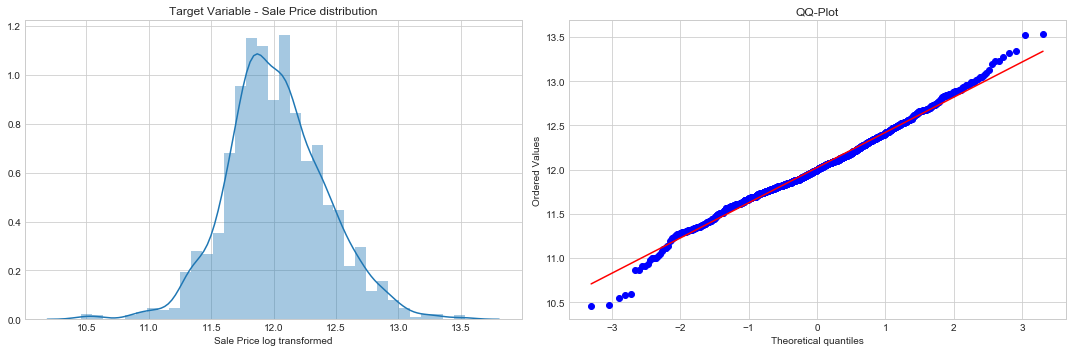

In [1271]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(y_log)
plt.title("Target Variable - Sale Price distribution")
plt.xlabel("Sale Price log transformed")

plt.subplot(1, 2, 2)
stats.probplot(y_log, plot=plt)
plt.title("QQ-Plot")
plt.tight_layout()
plt.show()

## 5.4 One Hot Encoding

In [1272]:
tr_df = pd.get_dummies(tr_df)
te_df = pd.get_dummies(te_df)

In [1273]:
print("Shape of train: ", tr_df.shape)
print("Shape of test: ", te_df.shape)

Shape of train:  (1456, 206)
Shape of test:  (1459, 192)


We can see that the number of columns in the test and train data is not the same. This means that we should delete columns that appear in the train data set and not in test set to avoid overfitting.

In [1274]:
cols_not_in_test = []

for column in tr_df:
    match = "null" 
    for col in te_df:
        if (column == col):
            match = col
    if (match == "null"):
        cols_not_in_test.append(column)

In [1275]:
cols_not_in_test

['Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'Electrical_SBrKr',
 'MiscFeature_TenC']

In [1276]:
for col in cols_not_in_test: 
    tr_df = tr_df.drop(col, axis=1)

## 5.5. Splitting the data in Train and Test and Scaling 

We were given train and test data. However, we don't have a way to check the results for test data. That is why I need to split the train data into train and test again to be able to check my results. The scaling will be done once the data is split. 

In [1288]:
te_df.shape

(1459, 192)

In [1303]:
#split it!
X_train, X_test, y_train, y_test = train_test_split(tr_df, y_log, test_size = 0.30, random_state = 42)

In [1304]:
quant_var = ['LotFrontage','LotArea','MasVnrArea', 'LowQualFinSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'MiscVal', 'PoolArea','TotalPorchSF','TotalSF','1stand2ndFlSF', 'Age', 'TimeSinceSold', 'TimeSinceRemod']


In [1327]:
#SCALER 1
scaler = StandardScaler()
X_train[quant_var] = scaler.fit_transform(X_train.loc[:,quant_var])
X_test[quant_var] = scaler.fit_transform(X_test.loc[:,quant_var])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

# 6. Modelling 

## 6.1. Define Scoring function

In [1335]:
def rmse(y_true, y_pred):
    return (np.sqrt(mean_squared_error(y_true, y_pred)))

## 6.1. Multiple Linear Regression

In [1347]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_train_pred_lin_reg = lin_reg.predict(X_train)
y_test_pred_lin_reg = lin_reg.predict(X_test)

#cv_lin_reg = cross_val_score(lin_reg, X_train, y_train, cv=10).mean()

print("RMSE on Train: ", rmse(y_train, y_train_pred_lin_reg))
print("RMSE on Test: ", rmse(y_test, y_test_pred_lin_reg))

print("R^2 on Train: ", r2_score(y_train, y_train_pred_lin_reg))
print("R^2 on Test: ", r2_score(y_test, y_test_pred_lin_reg))


#print("RMSE on Training set :", rmse_cv_train(lin_reg))
#print("RMSE on Test set :", rmse_cv_test(lin_reg))

#print("R^2 on Training set : ", r_sq_cv_train(lin_reg))
#print("R^2 on Test set : ", r_sq_cv_test(lin_reg))



RMSE on Train:  0.1097191130888193
RMSE on Test:  0.13323989893697588
R^2 on Train:  0.9265121281323565
R^2 on Test:  0.8803313800994119


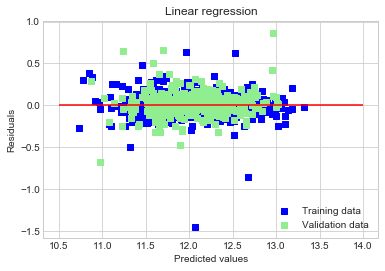

In [1348]:
plt.scatter(y_train_pred_lin_reg, y_train_pred_lin_reg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_lin_reg, y_test_pred_lin_reg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "lower right")
plt.hlines(y = 0, xmin = 10.5, xmax = 14, color = "red")
plt.show()

The results seem to be ok. Since the results are very close it might be that we are overfitting the model. Regularization might help. 

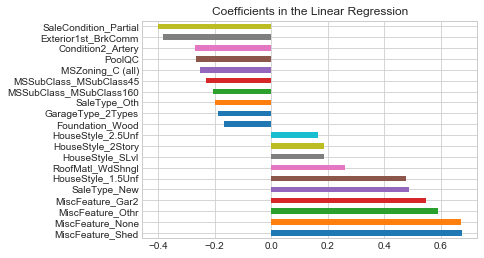

In [1489]:
coef6 = pd.Series(lin_reg.coef_, index = X_train.columns).sort_values(ascending=False)
imp_coef6 = pd.concat([coef6.head(10), coef6.tail(10)])
imp_coef6.plot(kind = "barh")
plt.title("Coefficients in the Linear Regression")
plt.show()

## 6.2 Ridge Regression

In [1380]:
def display_plot(cv_scores):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    ax.set_ylabel('R^2 Score ')
    ax.set_xlabel('Alpha')
    ax.set_title("R^2 versus different alphas")
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    plt.show()

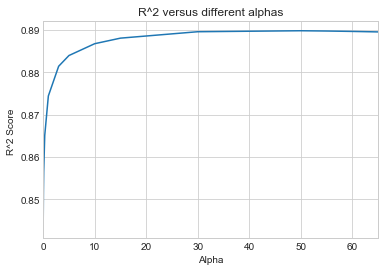

In [1381]:
#Determine the best alpha

alpha_space = [.0001, .0003, .0005, .0007, .0009, .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 55, 60, 65]
ridge_scores = []

ridge = Ridge()

for alpha in alpha_space: 
    
    ridge.alpha = alpha 
    
    ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    
display_plot(ridge_scores)

In [1387]:
ridge_reg = Ridge(alpha=33)
ridge_reg.fit(X_train, y_train)

y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)

print("RMSE on Train: ", rmse(y_train, y_train_pred_ridge))
print("RMSE on Test: ", rmse(y_test, y_test_pred_ridge))

print("R^2 on Train: ", r2_score(y_train, y_train_pred_ridge))
print("R^2 on Test: ", r2_score(y_test, y_test_pred_ridge))

RMSE on Train:  0.11865150300421926
RMSE on Test:  0.1150328978523975
R^2 on Train:  0.914059558174239
R^2 on Test:  0.9108018567484834


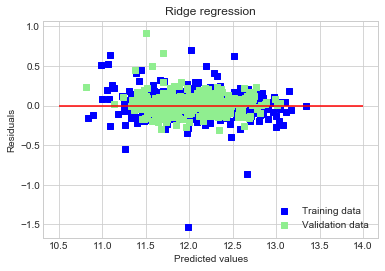

In [1388]:
plt.scatter(y_train_pred_ridge, y_train_pred_ridge - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_ridge, y_test_pred_ridge - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "lower right")
plt.hlines(y = 0, xmin = 10.5, xmax = 14, color = "red")
plt.show()

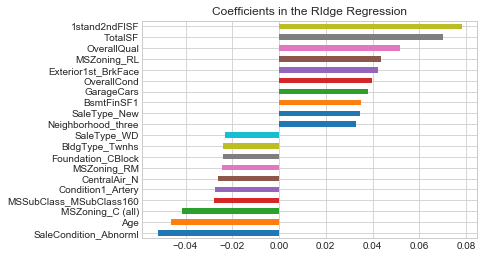

In [1482]:
coef5 = pd.Series(ridge_reg.coef_, index = X_train.columns).sort_values()
imp_coef5 = pd.concat([coef5.head(10), coef5.tail(10)])
imp_coef5.plot(kind = "barh")
plt.title("Coefficients in the RIdge Regression")
plt.show()

## 6.3. Lasso Regression

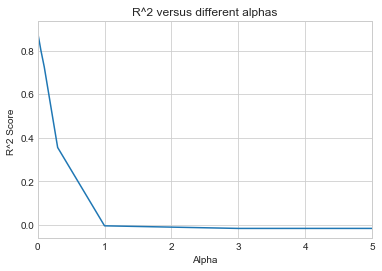

In [1395]:
alpha_space = [ .0001, .0003, .0005, .0007, .0009, .001, 0.003, 0.005, 0.007, 0.009, 0.01, 0.03, 0.05, 0.1, 0.3, 1, 3, 5, ]
lasso_scores = []

lasso = Lasso(max_iter=50000)

for alpha in alpha_space: 
    
    lasso.alpha = alpha 
    
    lasso_cv_scores = cross_val_score(lasso, X_train, y_train, cv=10)
    
    lasso_scores.append(np.mean(lasso_cv_scores))
    
display_plot(lasso_scores)

Alpha of .0007 seems to give best results. 

In [1397]:
lasso_reg = Lasso(alpha=0.0007)
lasso_reg.fit(X_train, y_train)

y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)

print("RMSE on Train: ", rmse(y_train, y_train_pred_lasso))
print("RMSE on Test: ", rmse(y_test, y_test_pred_lasso))

print("R^2 on Train: ", r2_score(y_train, y_train_pred_lasso))
print("R^2 on Test: ", r2_score(y_test, y_test_pred_lasso))

RMSE on Train:  0.11821782894138631
RMSE on Test:  0.11362028338472928
R^2 on Train:  0.9146866387927158
R^2 on Test:  0.9129791282656794


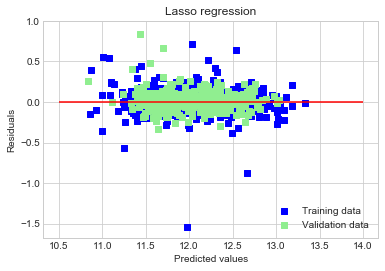

In [1398]:
plt.scatter(y_train_pred_lasso, y_train_pred_lasso - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_lasso, y_test_pred_lasso - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Lasso regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "lower right")
plt.hlines(y = 0, xmin = 10.5, xmax = 14, color = "red")
plt.show()

In [1400]:
np.sum(lasso_reg.coef_ !=0)

70

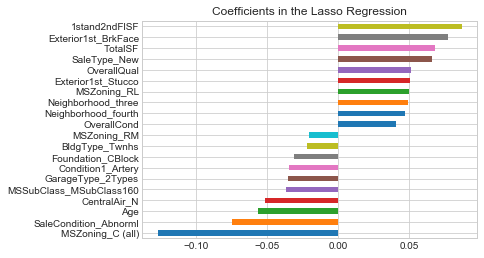

In [1483]:
coef = pd.Series(lasso_reg.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Regression")
plt.show()

## 6.4. ElasticNet

In [1497]:
l1_space = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

param_grid = {'l1_ratio': l1_space, 'alpha': [0.001, 0.003, 0.005, 0.007, 0.009, 0.01,  0.1, 0.3, 0.5]}

#elastic_net_scores = []

elastic_net = ElasticNet(max_iter=5000)

gm_cv_elastic_net = GridSearchCV(elastic_net, param_grid, cv=10)
gm_cv_elastic_net.fit(X_train, y_train)

y_train_pred_elastic_net = gm_cv_elastic_net.predict(X_train)
y_test_pred_elastic_net = gm_cv_elastic_net.predict(X_test)

print("Tuned ElasticNet l1 ratio and alpha: {}".format(gm_cv_elastic_net.best_params_))

print("RMSE on Train: ", rmse(y_train, y_train_pred_elastic_net))
print("RMSE on Test: ", rmse(y_test, y_test_pred_elastic_net))

print("R^2 on Train: ", r2_score(y_train, y_train_pred_elastic_net))
print("R^2 on Test: ", r2_score(y_test, y_test_pred_elastic_net))



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Tuned ElasticNet l1 ratio and alpha: {'alpha': 0.009, 'l1_ratio': 0.1}
RMSE on Train:  0.12059209144470238
RMSE on Test:  0.11458317330409935
R^2 on Train:  0.9112253949852736
R^2 on Test:  0.9114979390141228


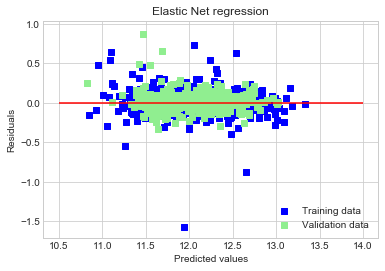

In [1498]:
plt.scatter(y_train_pred_elastic_net, y_train_pred_elastic_net - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_elastic_net, y_test_pred_elastic_net - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Elastic Net regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "lower right")
plt.hlines(y = 0, xmin = 10.5, xmax = 14, color = "red")
plt.show()

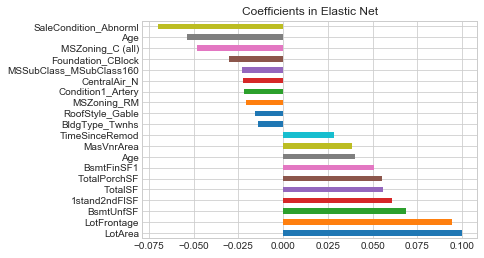

In [1499]:
coef4 = pd.Series(gm_cv_elastic_net.best_estimator_.coef_, X_train.columns).sort_values(ascending=False)
imp_coef4 = pd.concat([coef3.head(10), coef4.tail(10)])
imp_coef4.plot(kind='barh')
plt.title("Coefficients in Elastic Net")

plt.show()

# 6.5. XGBoost

In [1420]:
xgb = XGBRegressor(n_estimators=50000, learning_rate=0.01, max_depth=4, seed=42)

xgb.fit(X_train, y_train)

y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

print("RMSE on Train: ", rmse(y_train, y_train_pred_xgb))
print("RMSE on Test: ", rmse(y_test, y_test_pred_xgb))

print("R^2 on Train: ", r2_score(y_train, y_train_pred_xgb))
print("R^2 on Test: ", r2_score(y_test, y_test_pred_xgb))

RMSE on Train:  0.002631307701997278
RMSE on Test:  0.12333182195947283
R^2 on Train:  0.9999577336866896
R^2 on Test:  0.8974673958407067


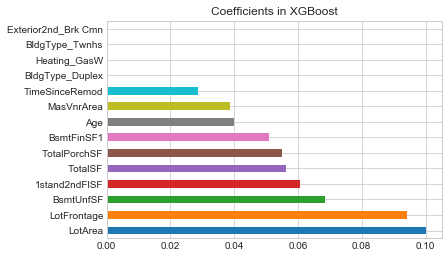

In [1486]:
coef3 = pd.Series(xgb.feature_importances_, X_train.columns).sort_values(ascending=False)
imp_coef3 = pd.concat([coef3.head(10), coef3.tail(4)])
imp_coef3.plot(kind='barh')
plt.title("Coefficients in XGBoost")

plt.show()

# 6.6 Random Forest

In [1432]:
r_forest = RandomForestRegressor(n_estimators= 3000, max_depth=5,oob_score = True, min_samples_leaf = 40, random_state=42)

r_forest.fit(X_train, y_train)

y_train_pred_r_forest = r_forest.predict(X_train)
y_test_pred_r_forest = r_forest.predict(X_test)

print("RMSE on Train: ", rmse(y_train, y_train_pred_r_forest))
print("RMSE on Test: ", rmse(y_test, y_test_pred_r_forest))

print("R^2 on Train: ", r2_score(y_train, y_train_pred_r_forest))
print("R^2 on Test: ", r2_score(y_test, y_test_pred_r_forest))

RMSE on Train:  0.1674742937050343
RMSE on Test:  0.16283452432149717
R^2 on Train:  0.8287827947051901
R^2 on Test:  0.8212670296586546


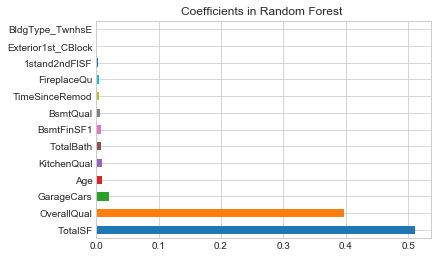

In [1487]:
coef2 = pd.Series(r_forest.feature_importances_, X_train.columns).sort_values(ascending=False)
imp_coef2 = pd.concat([coef2.head(11), coef2.tail(2)])
imp_coef2.plot(kind='barh')
plt.title("Coefficients in Random Forest ")
plt.show()

In [1502]:
r_forest = RandomForestRegressor(n_estimators= 5000 ,oob_score = True, min_samples_leaf = 40, random_state=42)

r_forest.fit(X_train, y_train)

y_train_pred_r_forest = r_forest.predict(X_train)
y_test_pred_r_forest = r_forest.predict(X_test)

print("RMSE on Train: ", rmse(y_train, y_train_pred_r_forest))
print("RMSE on Test: ", rmse(y_test, y_test_pred_r_forest))

print("R^2 on Train: ", r2_score(y_train, y_train_pred_r_forest))
print("R^2 on Test: ", r2_score(y_test, y_test_pred_r_forest))

RMSE on Train:  0.16751692511505895
RMSE on Test:  0.1629473693101146
R^2 on Train:  0.8286956152372448
R^2 on Test:  0.8210192184683808
